In [322]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

from plotly import tools
import chart_studio.plotly as py

warnings.filterwarnings('ignore')

%matplotlib inline

In [450]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import balanced_accuracy_score,roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV #Optimization 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [324]:
original_df = pd.read_csv('Risk Analytics.csv')

df=original_df.copy()

In [325]:
df.head()

,Loan ID,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,1,0,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Core staff,1.0,Religion


In [326]:
df.shape

(307511, 18)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   307511 non-null  int64  
 1   Payment                   307511 non-null  int64  
 2   Loan Type                 307511 non-null  object 
 3   Gender                    307511 non-null  object 
 4   Have a car?               307511 non-null  object 
 5   Have a house              307511 non-null  object 
 6   Number of Children        307511 non-null  int64  
 7   Total Income              307511 non-null  float64
 8   Amount of Credit          307511 non-null  float64
 9   Suite Type                306219 non-null  object 
 10  Income Type               307511 non-null  object 
 11  Education Type            307511 non-null  object 
 12  Family Status             307511 non-null  object 
 13  Have a phone?             307511 non-null  i

<AxesSubplot:>

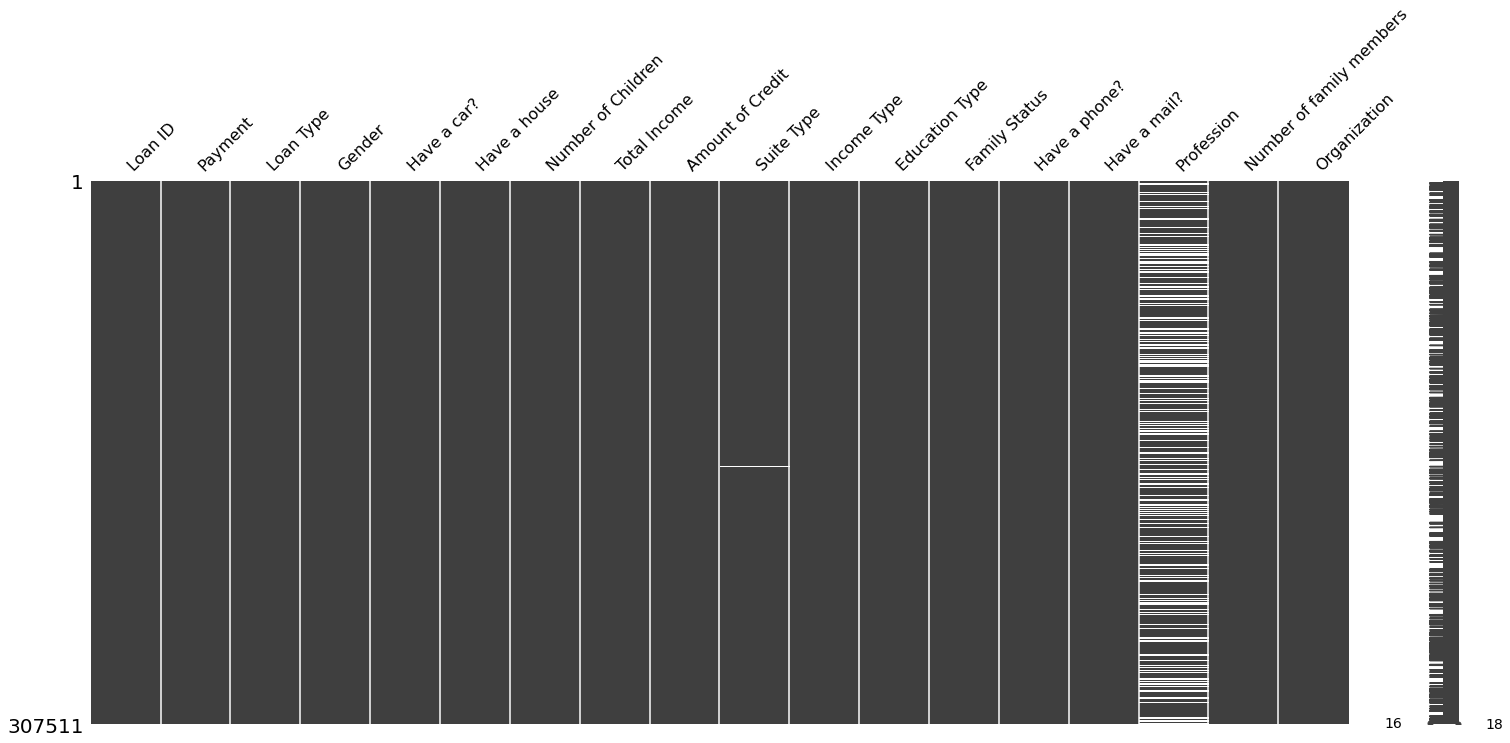

In [328]:
import missingno as mn
mn.matrix(df)

In [329]:
df.isnull().sum()

Loan ID                         0
Payment                         0
Loan Type                       0
Gender                          0
Have a car?                     0
Have a house                    0
Number of Children              0
Total Income                    0
Amount of Credit                0
Suite Type                   1292
Income Type                     0
Education Type                  0
Family Status                   0
Have a phone?                   0
Have a mail?                    0
Profession                  96391
Number of family members        2
Organization                    0
dtype: int64

In [330]:
for i in df.columns:
    print("{}: ".format(i),round((df[i].isnull().sum()/df.shape[0])*100,2),"%")

Loan ID:  0.0 %
Payment:  0.0 %
Loan Type:  0.0 %
Gender:  0.0 %
Have a car?:  0.0 %
Have a house:  0.0 %
Number of Children:  0.0 %
Total Income:  0.0 %
Amount of Credit:  0.0 %
Suite Type:  0.42 %
Income Type:  0.0 %
Education Type:  0.0 %
Family Status:  0.0 %
Have a phone?:  0.0 %
Have a mail?:  0.0 %
Profession:  31.35 %
Number of family members:  0.0 %
Organization:  0.0 %


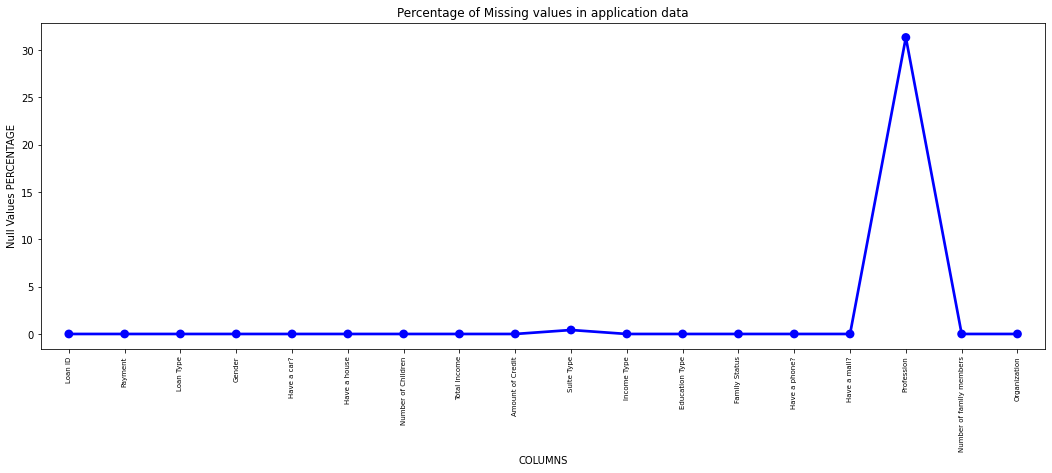

In [331]:
null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [332]:
df.drop(['Loan ID'], axis=1, inplace=True)

<AxesSubplot:>

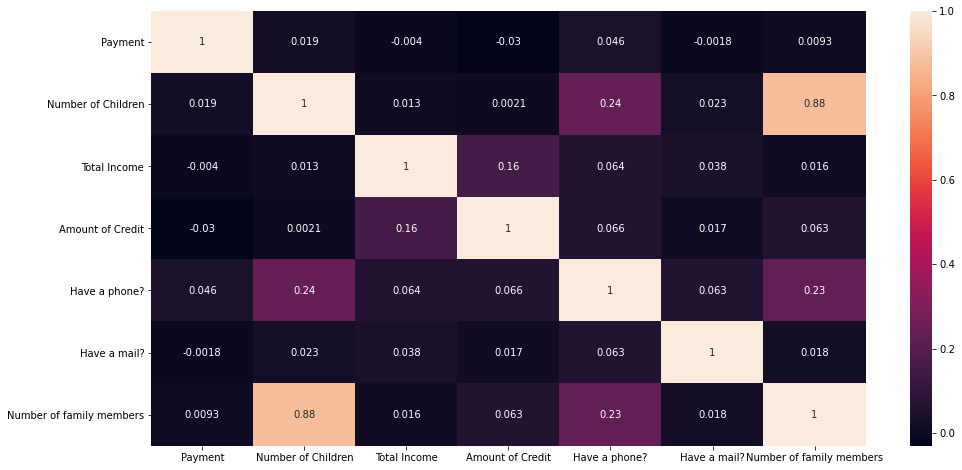

In [333]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)


In [334]:
df['Total Income']=df['Total Income']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df['Total_Income_Range']=pd.cut(df['Total Income'],bins,labels=slot)

In [335]:
df['Total_Income_Range'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: Total_Income_Range, dtype: float64

In [336]:
df['Amount of Credit']=df['Amount of Credit']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df['Amount_Credit_Range']=pd.cut(df['Amount of Credit'],bins,labels=slot)

In [337]:
df

,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization,Total_Income_Range,Amount_Credit_Range
0,1,Cash loans,M,N,Y,0,2.025,4.065975,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Business Entity Type 3,200k-300k,400k-500k
1,0,Cash loans,F,N,N,0,2.700,12.935025,Family,State servant,Higher education,Married,1,0,Core staff,2.0,School,200k-300k,NaN
2,0,Revolving loans,M,Y,Y,0,0.675,1.350000,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Government,0-100K,100K-200K
3,0,Cash loans,F,N,Y,0,1.350,3.126825,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Laborers,2.0,Business Entity Type 3,100K-200K,300k-400k
4,0,Cash loans,M,N,Y,0,1.215,5.130000,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Core staff,1.0,Religion,100K-200K,500k-600k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,1.575,2.547000,Unaccompanied,Working,Secondary / secondary special,Separated,1,0,Sales staff,1.0,Services,100K-200K,200k-300k
307507,0,Cash loans,F,N,Y,0,0.720,2.695500,Unaccompanied,Pensioner,Secondary / secondary special,Widow,0,0,NaN,1.0,XNA,0-100K,200k-300k
307508,0,Cash loans,F,N,Y,0,1.530,6.776640,Unaccompanied,Working,Higher education,Separated,1,1,Managers,1.0,School,100K-200K,600k-700k
307509,1,Cash loans,F,N,Y,0,1.710,3.701070,Unaccompanied,Commercial associate,Secondary / secondary special,Married,1,0,Laborers,2.0,Business Entity Type 1,100K-200K,300k-400k


In [338]:
df['Amount_Credit_Range'].fillna('1M Above',inplace=True)

In [339]:
df['Amount of Credit']=df['Amount of Credit']*100000

In [340]:
df['Total_Income_Range'].fillna('1M Above',inplace=True)

In [341]:
df['Total Income']=df['Total Income']*100000

In [342]:
df['Amount_Credit_Range'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: Amount_Credit_Range, dtype: float64

In [343]:
df['Total_Income_Range'].value_counts(normalize=True)*100

100K-200K    50.696723
200k-300k    21.194689
0-100K       20.714056
300k-400k     4.772512
400k-500k     1.743352
500k-600k     0.356085
600k-700k     0.282592
800k-900k     0.096907
1M Above      0.081298
700k-800k     0.052681
900k-1M       0.009105
Name: Total_Income_Range, dtype: float64

In [344]:
df.nunique().sort_values()

Payment                        2
Loan Type                      2
Have a car?                    2
Have a house                   2
Have a mail?                   2
Have a phone?                  2
Gender                         3
Education Type                 5
Family Status                  6
Suite Type                     7
Income Type                    8
Total_Income_Range            11
Amount_Credit_Range           11
Number of Children            15
Number of family members      17
Profession                    18
Organization                  58
Total Income                2548
Amount of Credit            5603
dtype: int64

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Payment                   307511 non-null  int64   
 1   Loan Type                 307511 non-null  object  
 2   Gender                    307511 non-null  object  
 3   Have a car?               307511 non-null  object  
 4   Have a house              307511 non-null  object  
 5   Number of Children        307511 non-null  int64   
 6   Total Income              307511 non-null  float64 
 7   Amount of Credit          307511 non-null  float64 
 8   Suite Type                306219 non-null  object  
 9   Income Type               307511 non-null  object  
 10  Education Type            307511 non-null  object  
 11  Family Status             307511 non-null  object  
 12  Have a phone?             307511 non-null  int64   
 13  Have a mail?              307

In [346]:
categorical_columns = ['Loan Type','Gender','Have a car?','Have a house','Suite Type','Income Type',
                       'Education Type','Family Status','Profession','Organization'
                      ]
for col in categorical_columns:
    df[col] =pd.Categorical(df[col])

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Payment                   307511 non-null  int64   
 1   Loan Type                 307511 non-null  category
 2   Gender                    307511 non-null  category
 3   Have a car?               307511 non-null  category
 4   Have a house              307511 non-null  category
 5   Number of Children        307511 non-null  int64   
 6   Total Income              307511 non-null  float64 
 7   Amount of Credit          307511 non-null  float64 
 8   Suite Type                306219 non-null  category
 9   Income Type               307511 non-null  category
 10  Education Type            307511 non-null  category
 11  Family Status             307511 non-null  category
 12  Have a phone?             307511 non-null  int64   
 13  Have a mail?              307

In [348]:
df['Suite Type'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: Suite Type, dtype: object

In [349]:
df['Suite Type'].fillna((df['Suite Type'].mode()[0]),inplace = True)

In [350]:
df['Number of family members'].fillna(df['Number of family members'].median(),inplace = True)

In [351]:
df.isnull().sum()

Payment                         0
Loan Type                       0
Gender                          0
Have a car?                     0
Have a house                    0
Number of Children              0
Total Income                    0
Amount of Credit                0
Suite Type                      0
Income Type                     0
Education Type                  0
Family Status                   0
Have a phone?                   0
Have a mail?                    0
Profession                  96391
Number of family members        0
Organization                    0
Total_Income_Range              0
Amount_Credit_Range             0
dtype: int64

In [352]:
df['Profession'] = df['Profession'].cat.add_categories('Unknown')
df['Profession'].fillna('Unknown', inplace =True) 

In [353]:
df.isnull().sum()

Payment                     0
Loan Type                   0
Gender                      0
Have a car?                 0
Have a house                0
Number of Children          0
Total Income                0
Amount of Credit            0
Suite Type                  0
Income Type                 0
Education Type              0
Family Status               0
Have a phone?               0
Have a mail?                0
Profession                  0
Number of family members    0
Organization                0
Total_Income_Range          0
Amount_Credit_Range         0
dtype: int64

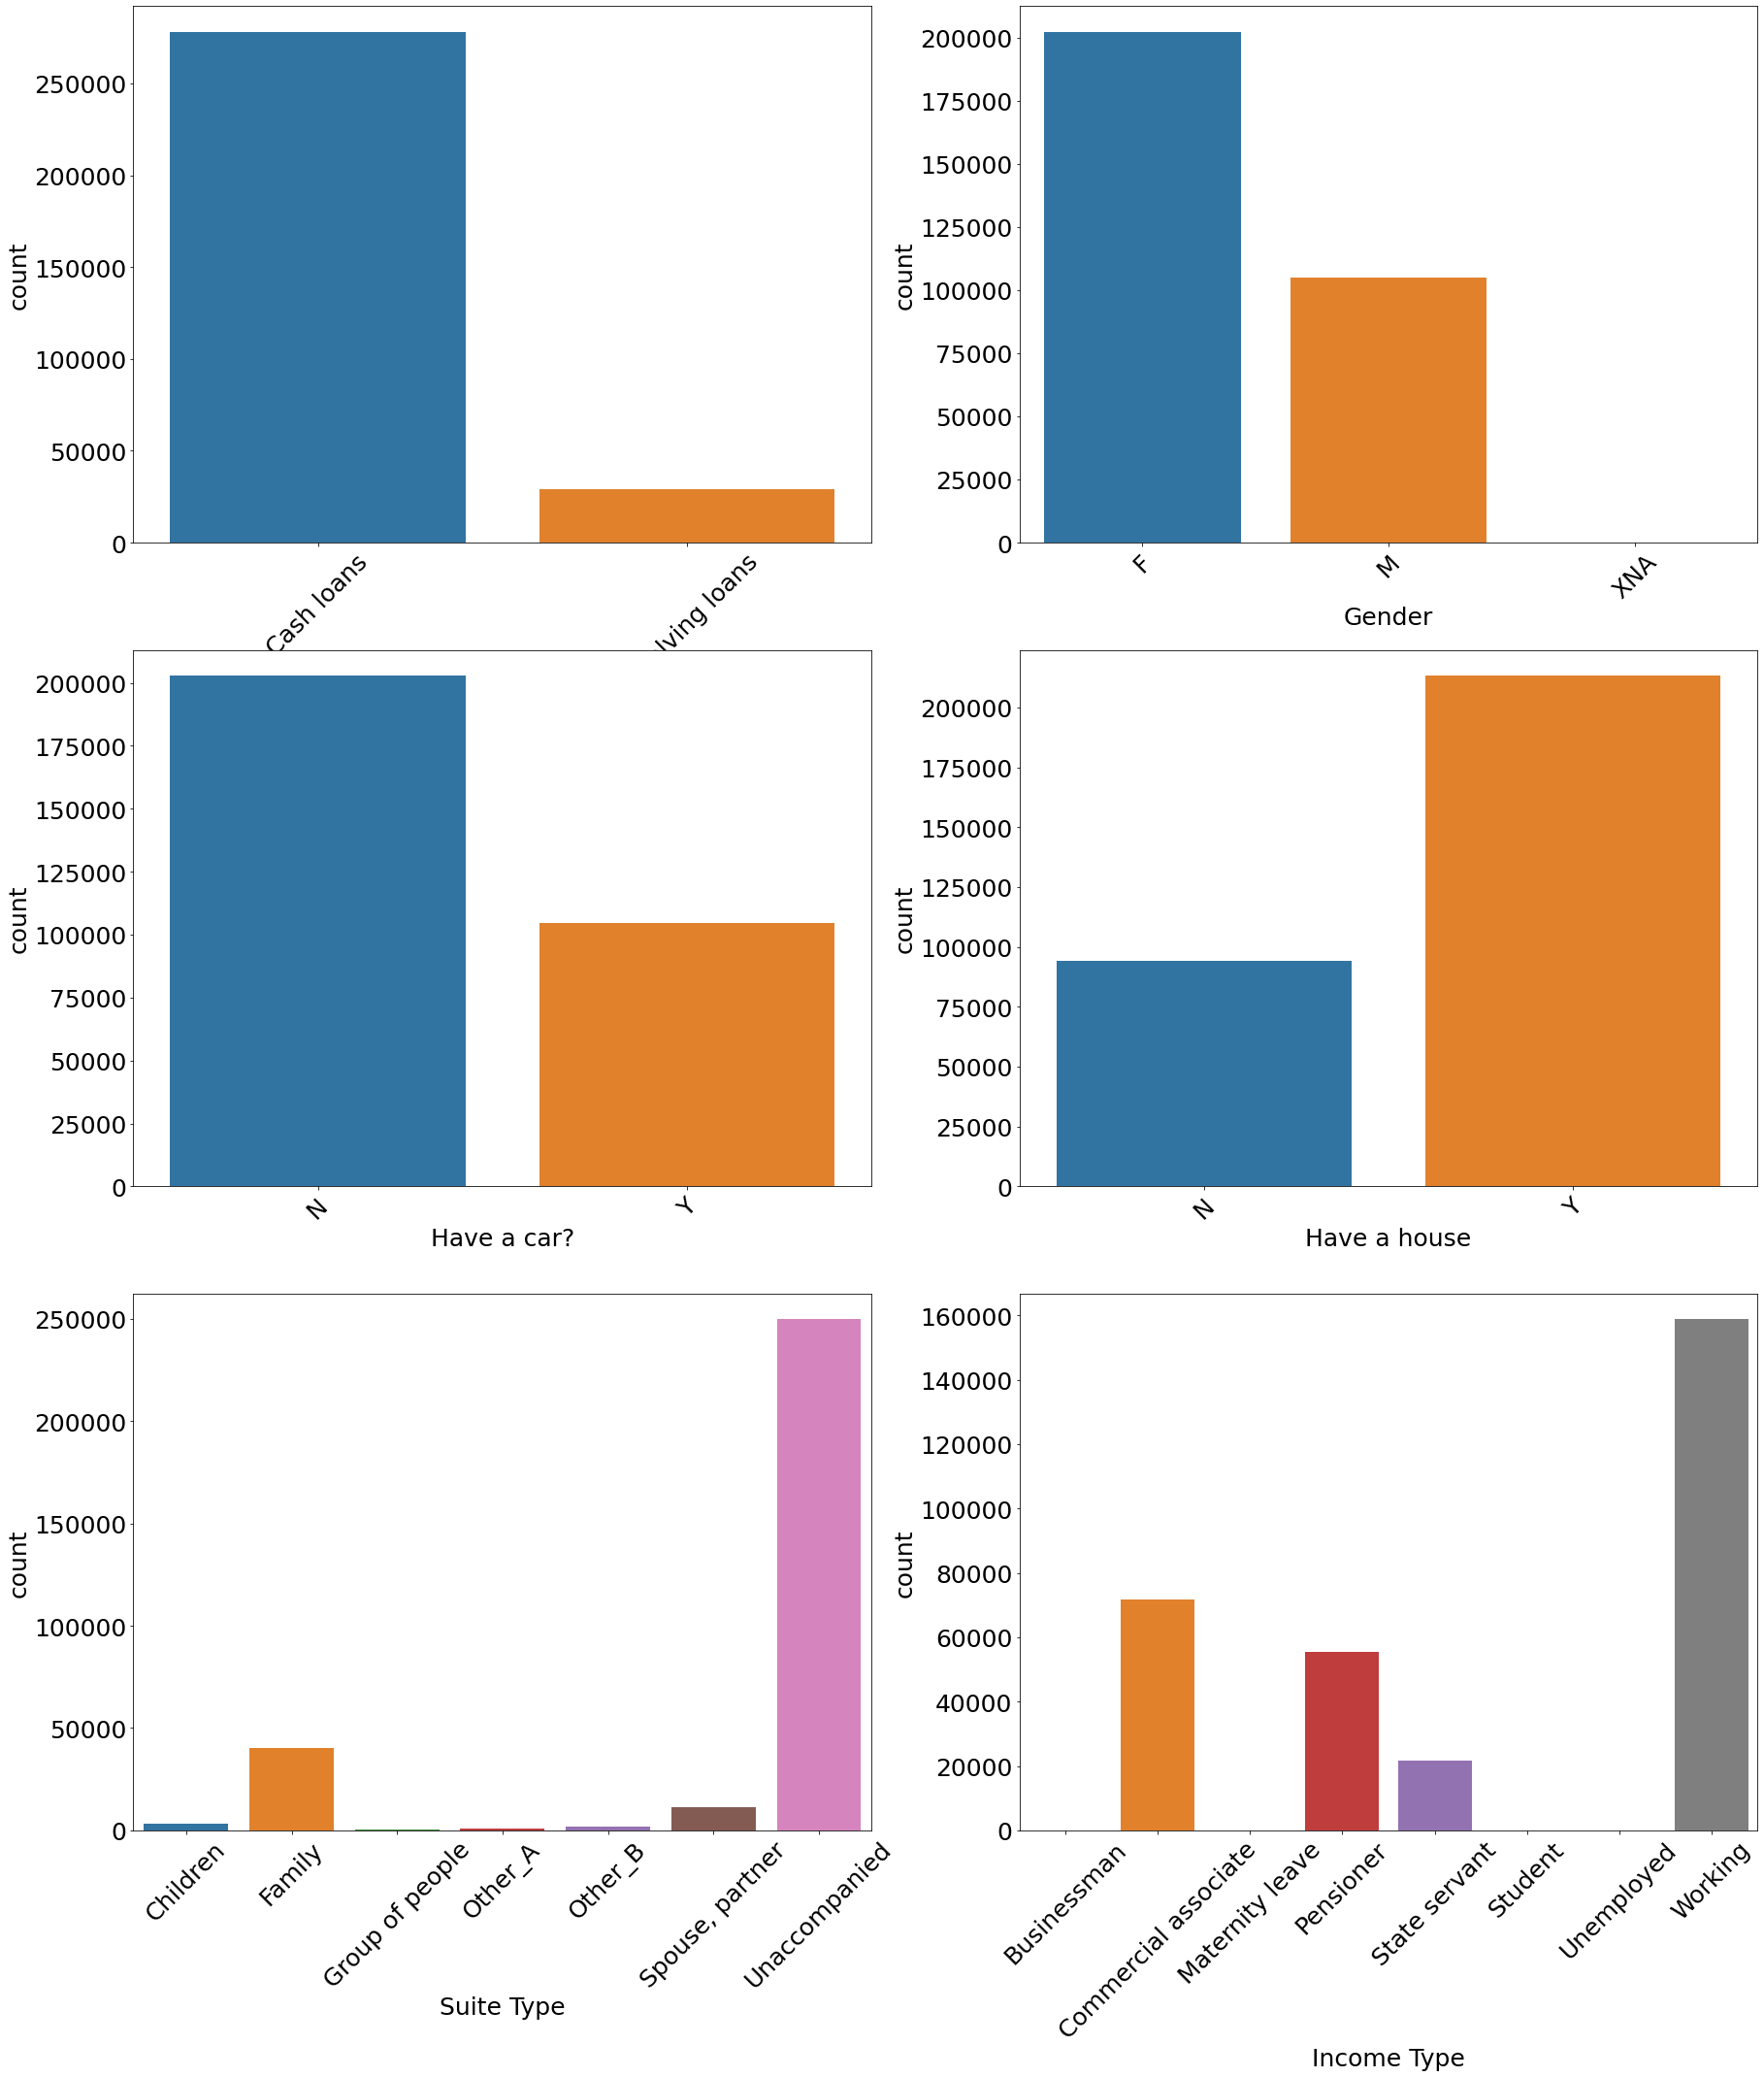

In [534]:
categorical_columns1 = ['Loan Type','Gender','Have a car?','Have a house','Suite Type','Income Type']
                      
plt.figure(figsize=(30,120))
i=1
for col in categorical_columns1:
    plt.subplot(10,2,i)
    sns.countplot(df[col])
    plt.xticks(rotation=45,fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    
    i=i+1

##### - Most of applicants for loans have income type as Working
##### - There are more cash loans and female clients

In [355]:
df['Gender'].value_counts()

F      202448
M      105059
XNA         4
Name: Gender, dtype: int64

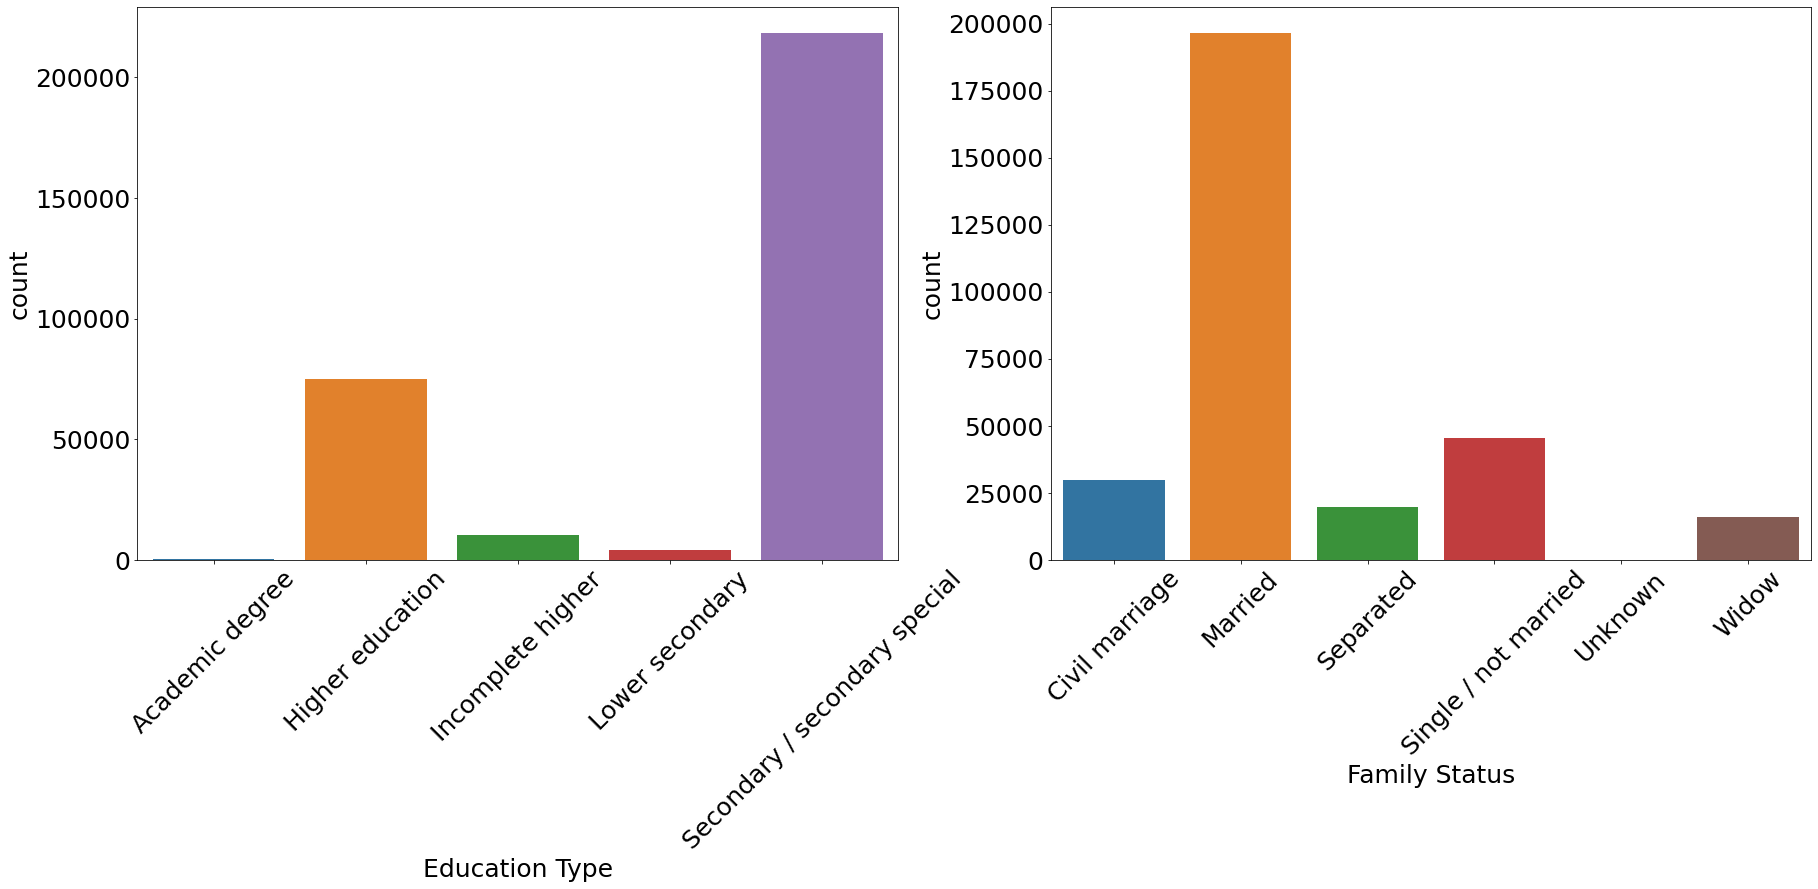

In [356]:
categorical_columns2 = ['Education Type','Family Status']

plt.figure(figsize=(30,120))
i=1
for col in categorical_columns2:
    plt.subplot(10,2,i)
    sns.countplot(df[col])
    plt.xticks(rotation=45,fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    
    i=i+1
#     plt.subplot(10,2,i)
#     sns.boxplot(df[col])
#     #plt.xticks(fontsize=25)
#     #plt.yticks(fontsize=25)
#     #plt.xlabel(col,fontsize=25)
#     #plt.ylabel('price',fontsize=25)
    
#     i=i+1


Text(0, 0.5, 'count')

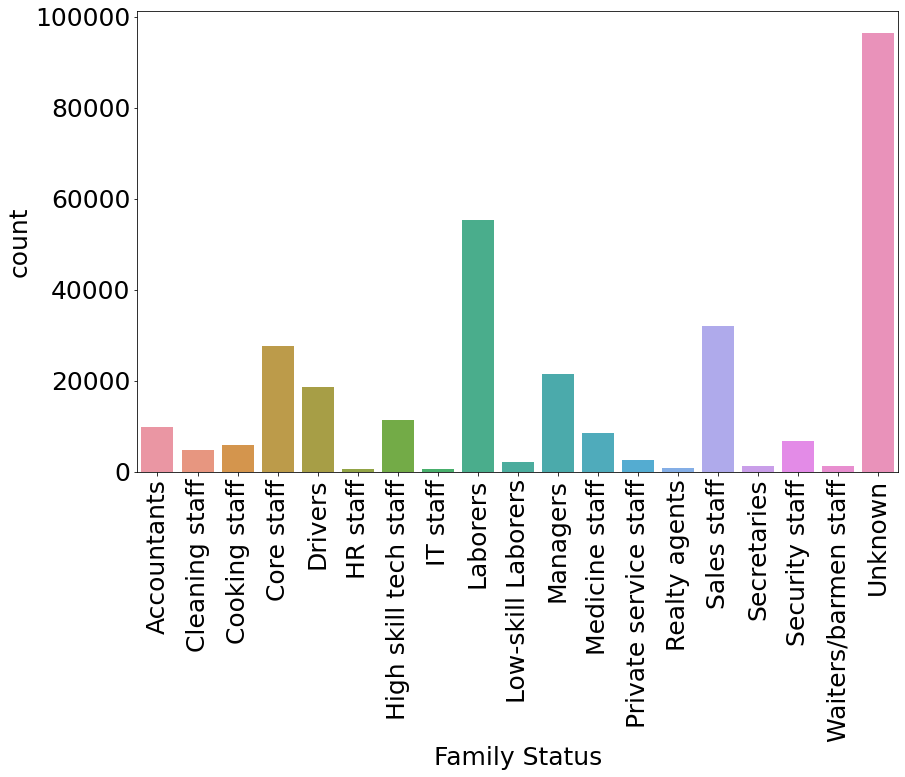

In [357]:
plt.figure(figsize=(30,100))
plt.subplot(10,2,2)
sns.countplot(df['Profession'])
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(col,fontsize=25)
plt.ylabel('count',fontsize=25)

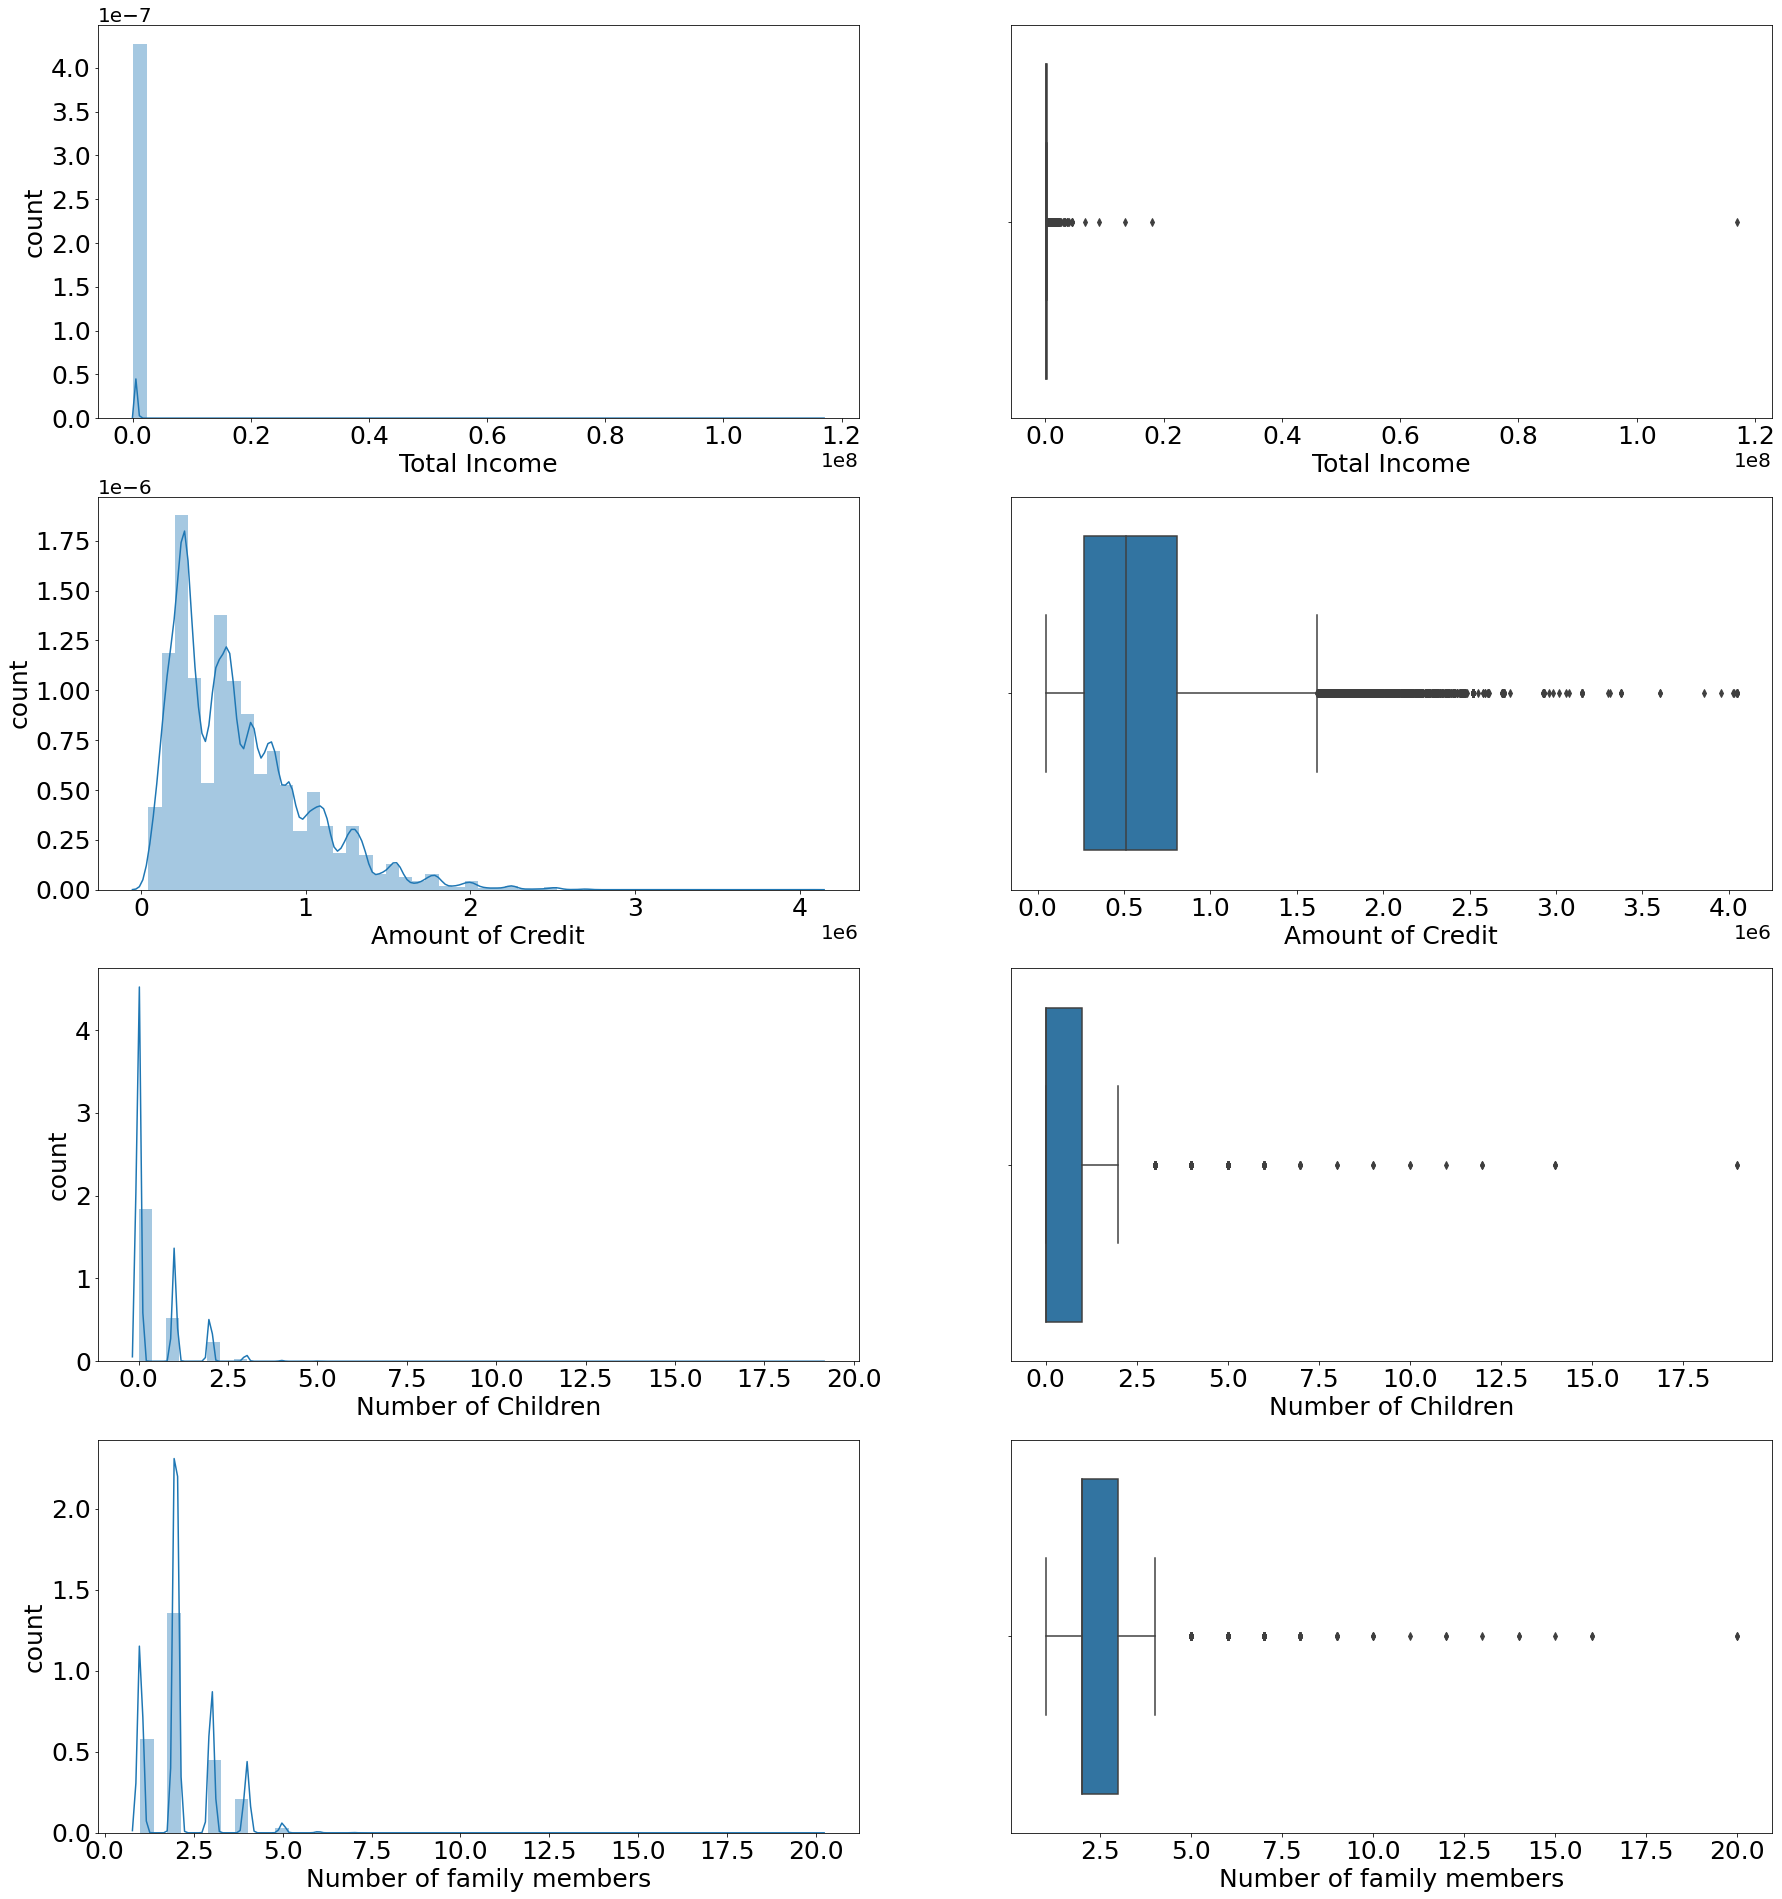

In [358]:
# df['Total Income']=df['Total Income']*1000
# df['Amount of Credit']=df['Amount of Credit']*1000

num_cols=['Total Income','Amount of Credit','Number of Children','Number of family members']
plt.figure(figsize=(30,120))
i=1
for col in num_cols:
    plt.subplot(14,2,i)
    sns.distplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    plt.gca().yaxis.get_offset_text().set_fontsize(20)
    plt.gca().xaxis.get_offset_text().set_fontsize(20)
    i=i+1
    plt.subplot(14,2,i)
    sns.boxplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.gca().yaxis.get_offset_text().set_fontsize(20)
    plt.gca().xaxis.get_offset_text().set_fontsize(20)
    i=i+1

In [359]:
df[df['Number of family members']<df['Number of Children']]

,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization,Total_Income_Range,Amount_Credit_Range


<AxesSubplot:title={'center':'Loan Status'}, ylabel='Payment'>

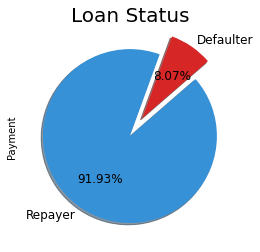

In [360]:
labels ="Repayer", "Defaulter"
colors = ["#3791D7", "#D72626"]

plt.title('Loan Status', fontsize=20)

df["Payment"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

In [361]:
df["Payment"].value_counts()

0    282686
1     24825
Name: Payment, dtype: int64

In [362]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of payment=1 per category value
    cat_perc = df[[feature, 'Payment']].groupby([feature],as_index=False).mean()
    cat_perc["Payment"] = cat_perc["Payment"]*100
    cat_perc.sort_values(by='Payment', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="Payment",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
     # 2. Subplot 2: Percentage of defaulters within the categorical column
    
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Payment', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

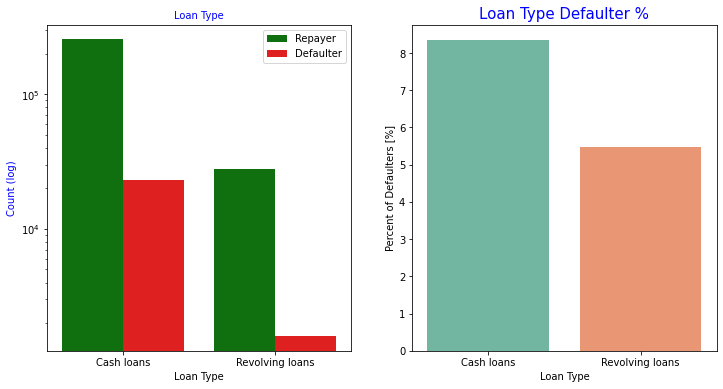

In [363]:
univariate_categorical('Loan Type',True)

##### Most people applied for cash loans but default chance is most likely to occur in cash loans.

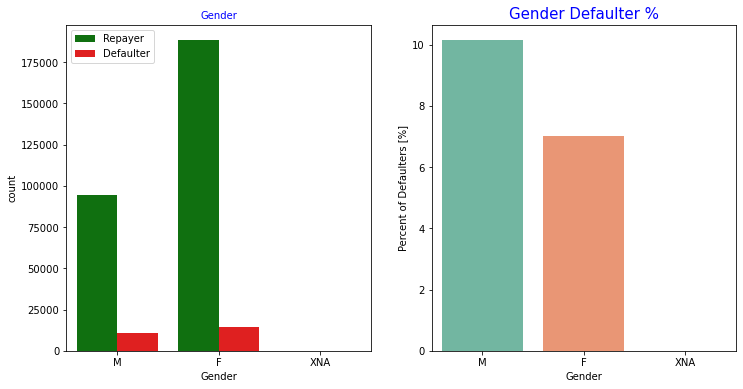

In [364]:
univariate_categorical('Gender')

##### - Females applied for loan more than males. It seems that females clients are safer than males in terms of returning loan. 

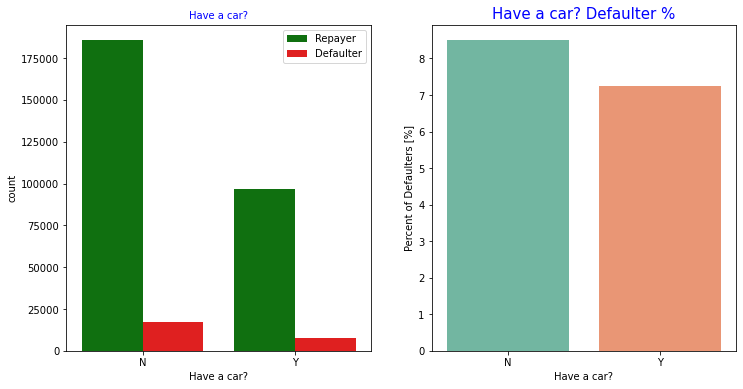

In [365]:
univariate_categorical('Have a car?')

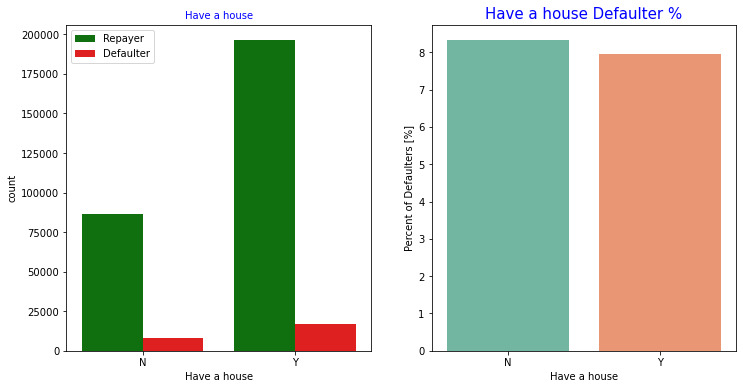

In [366]:
univariate_categorical('Have a house')

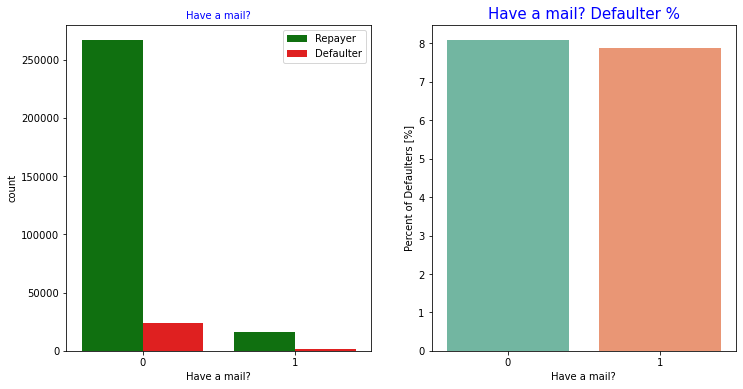

In [367]:
univariate_categorical('Have a mail?')

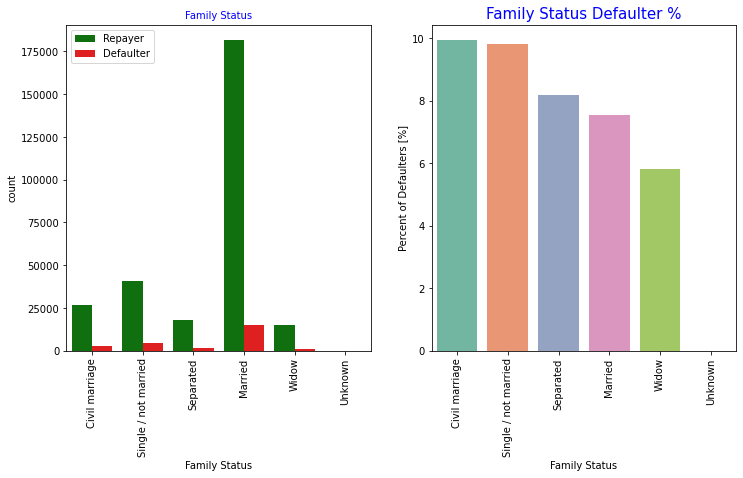

In [368]:
univariate_categorical("Family Status",False,True,True)

#### - Married people are likely to repay loans.

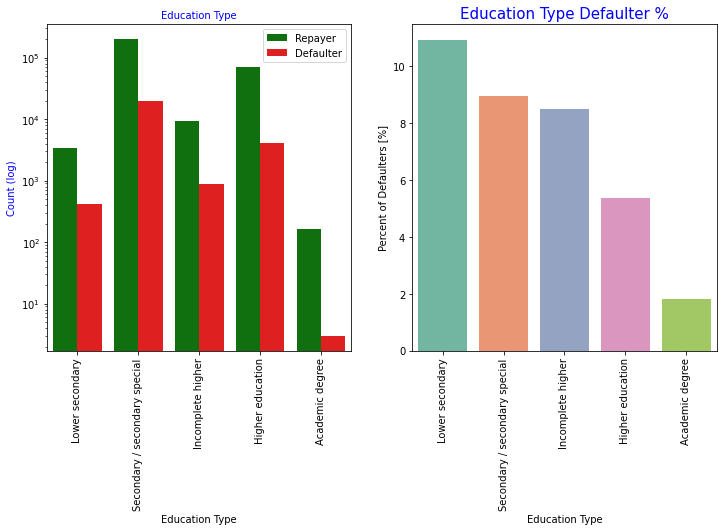

In [369]:
univariate_categorical("Education Type",True,True,True)

##### - Academic degree has less defaults.

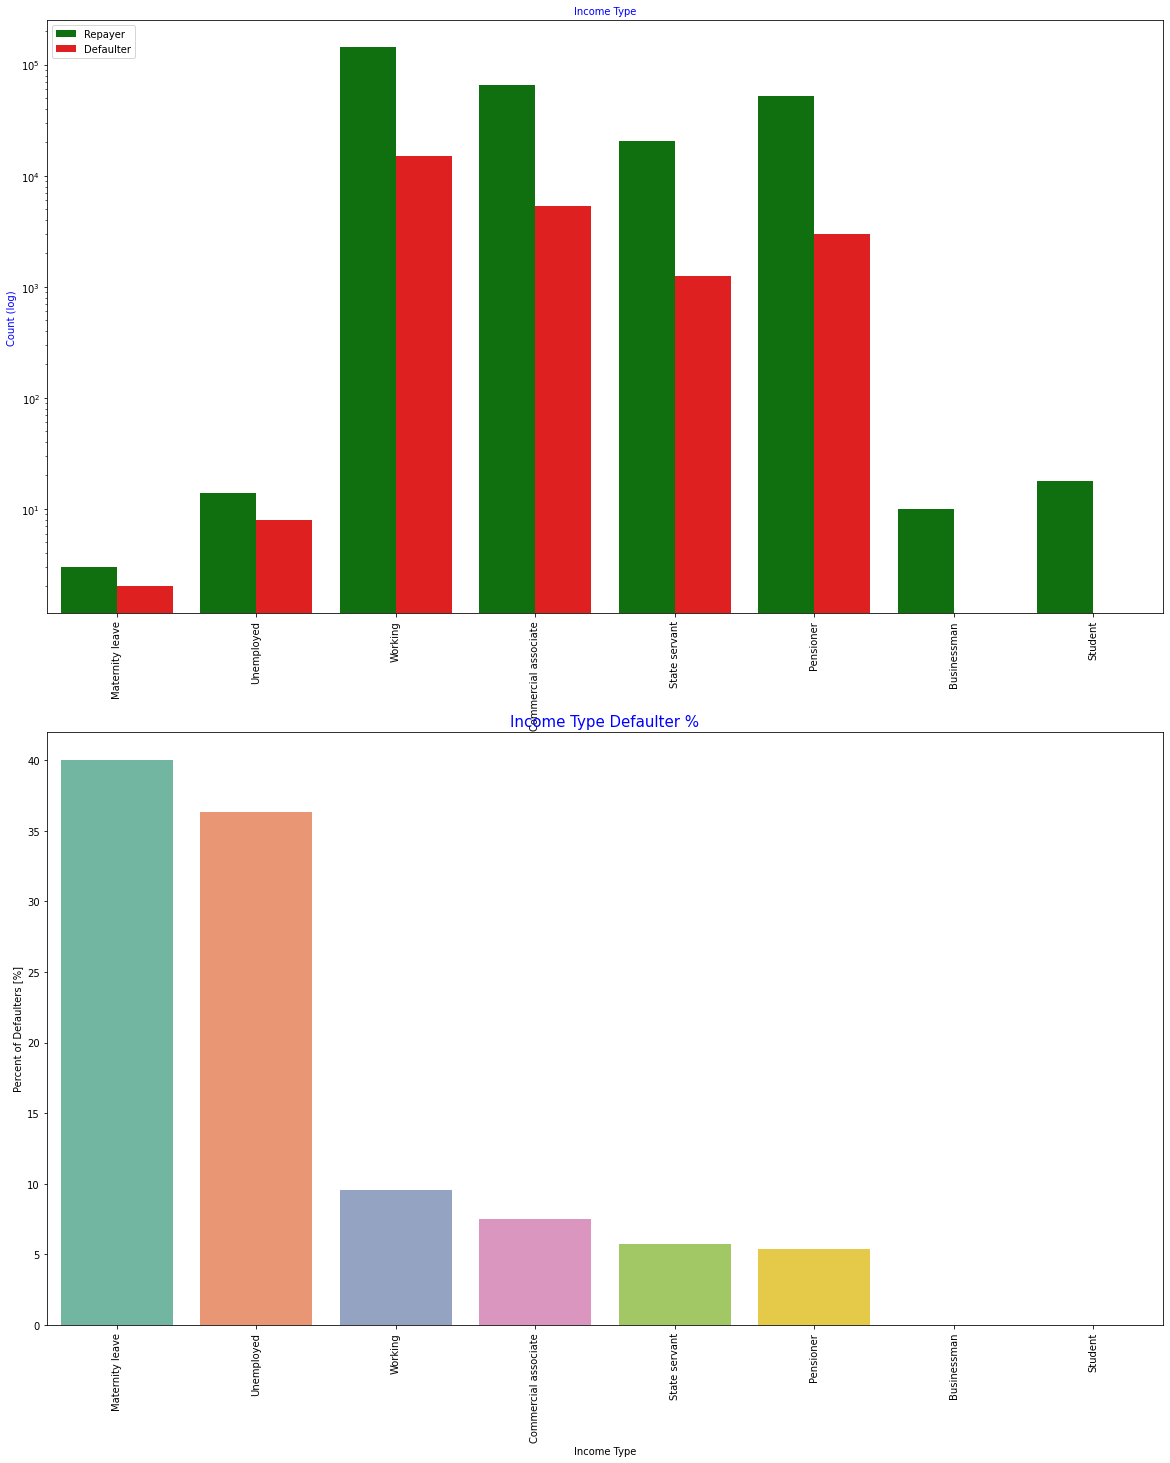

In [370]:
univariate_categorical("Income Type",True,True,False)

##### - Businessman and students have no defaults

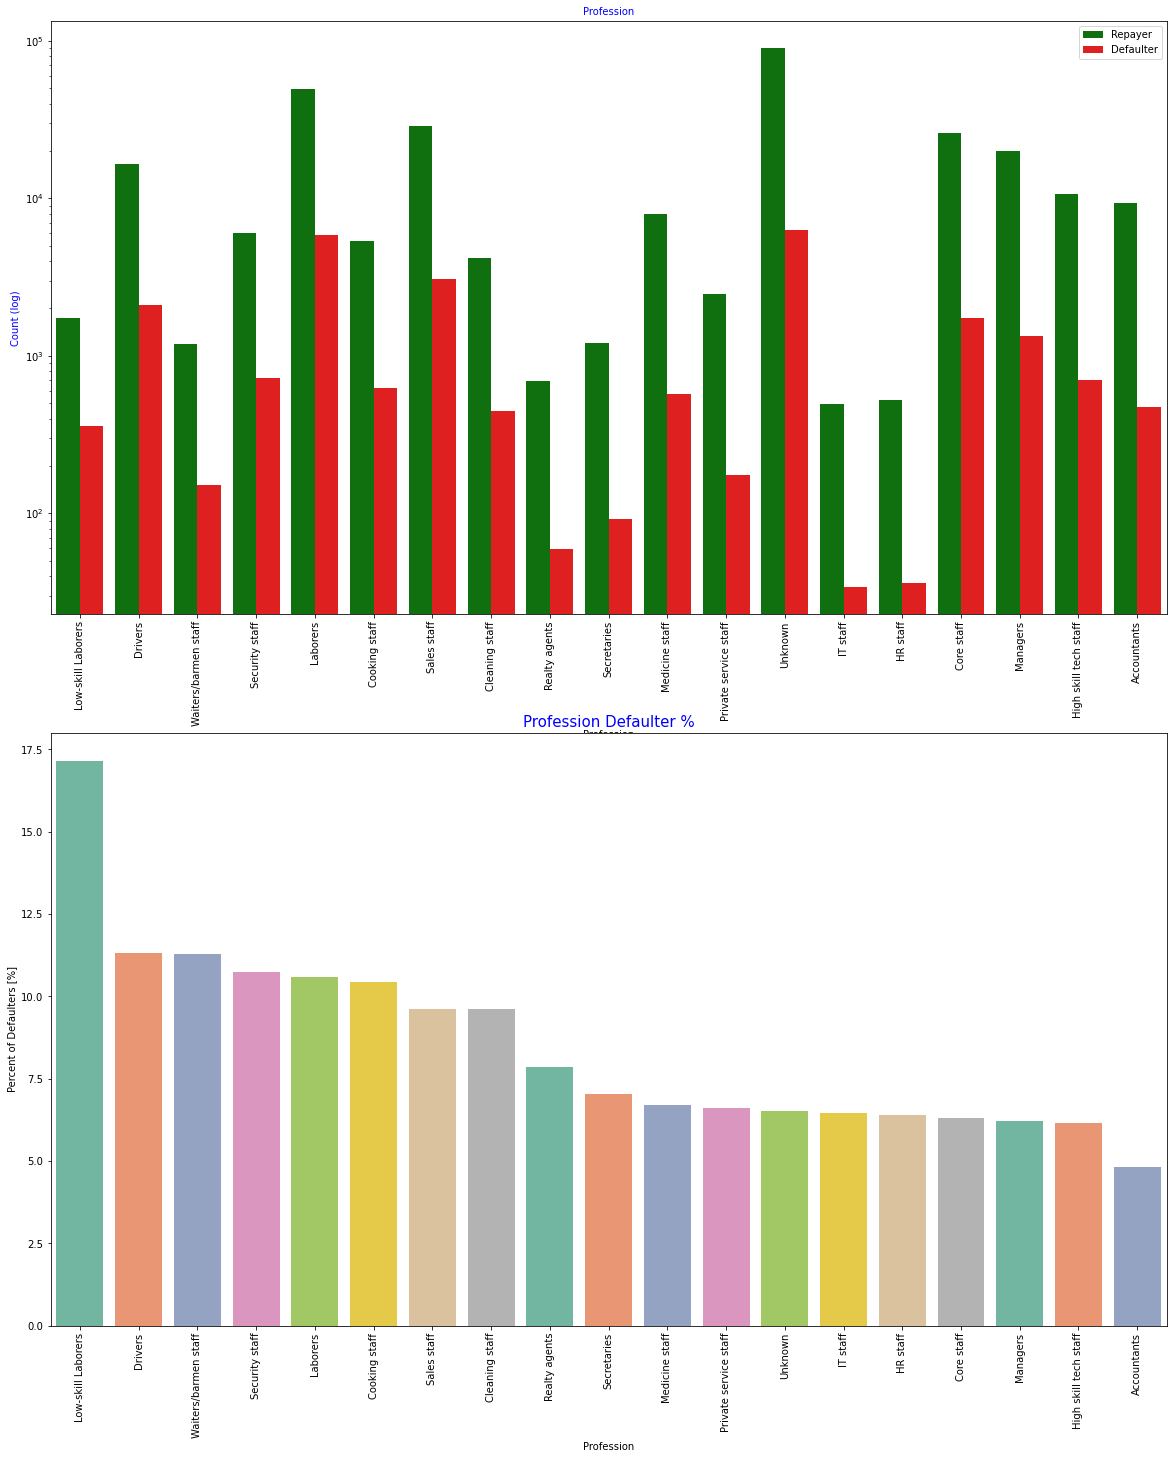

In [371]:
univariate_categorical("Profession",True,True,False)

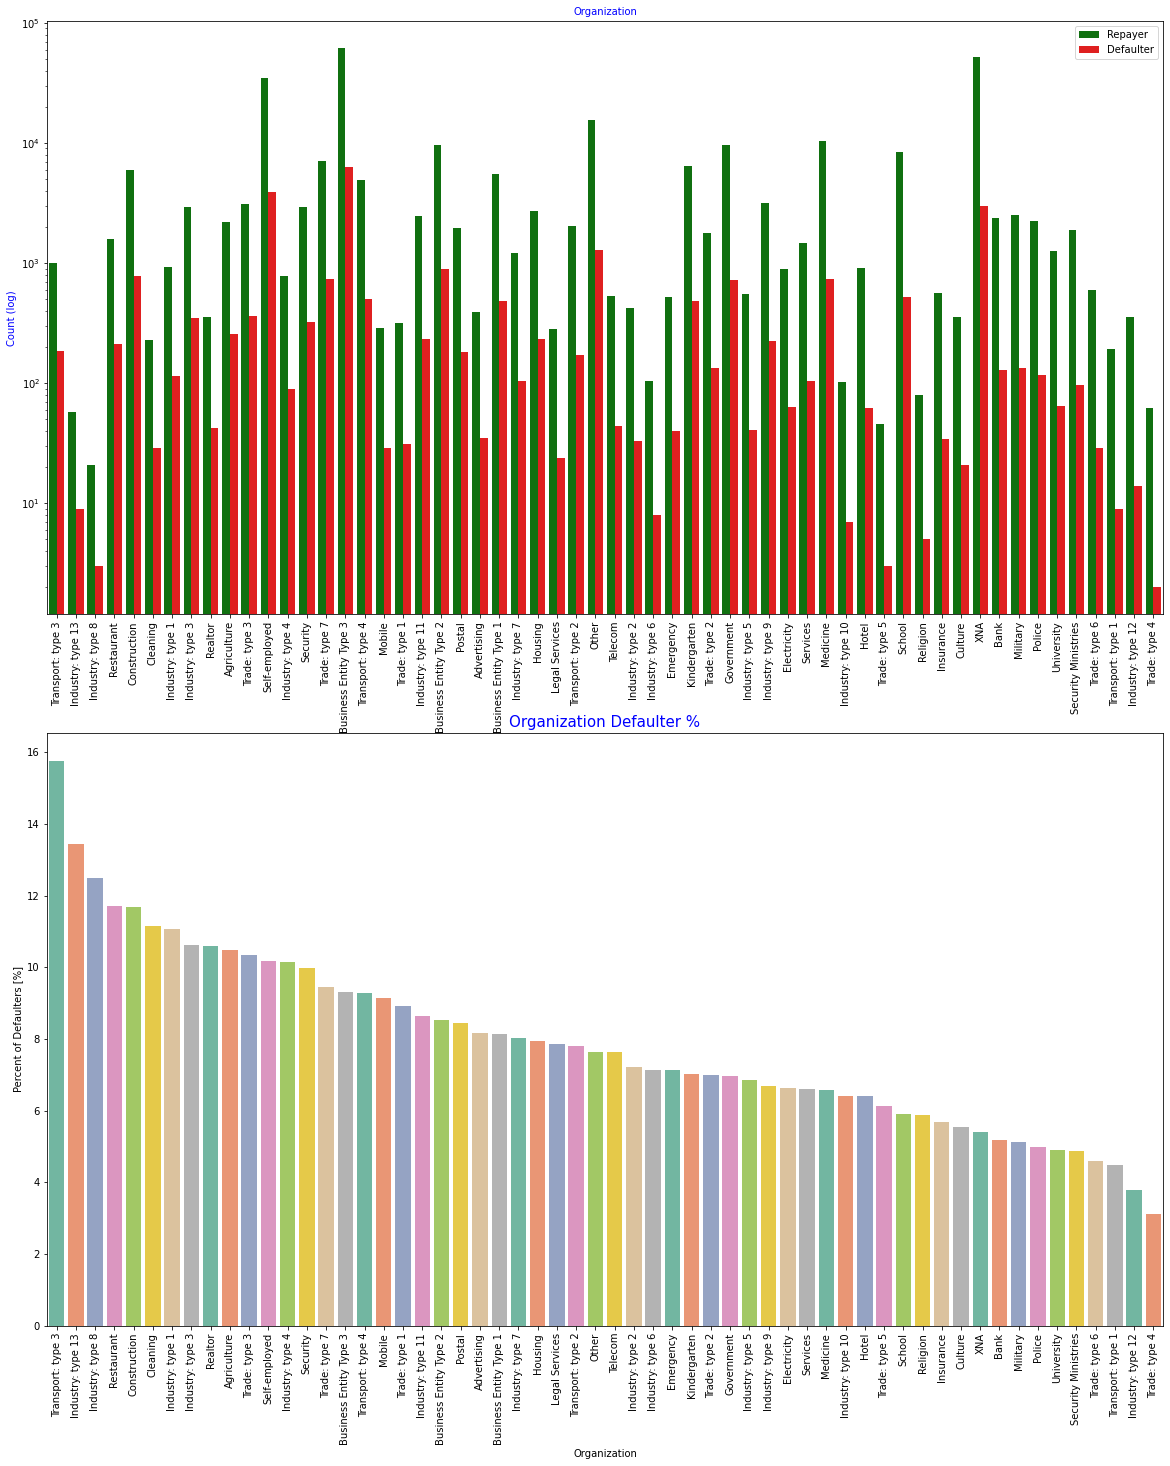

In [372]:
univariate_categorical("Organization",True,True,False)

- Most of people from "Transport type 3", "Industry type 13" and "Industry type 8" did not repay loans with 15.8%, 13.5% and 12.5% respectively. People from those organizations can be approved in case of higher interest rate. 

- Most people applied for loan are from "Business Entity Type 3" and "XNA" whose name is not provided somehow.

- According the second graph, clients of "Trade type 4" and "Industry type 12" have less defaults, thus, those people can be considered safe in terms of loan.

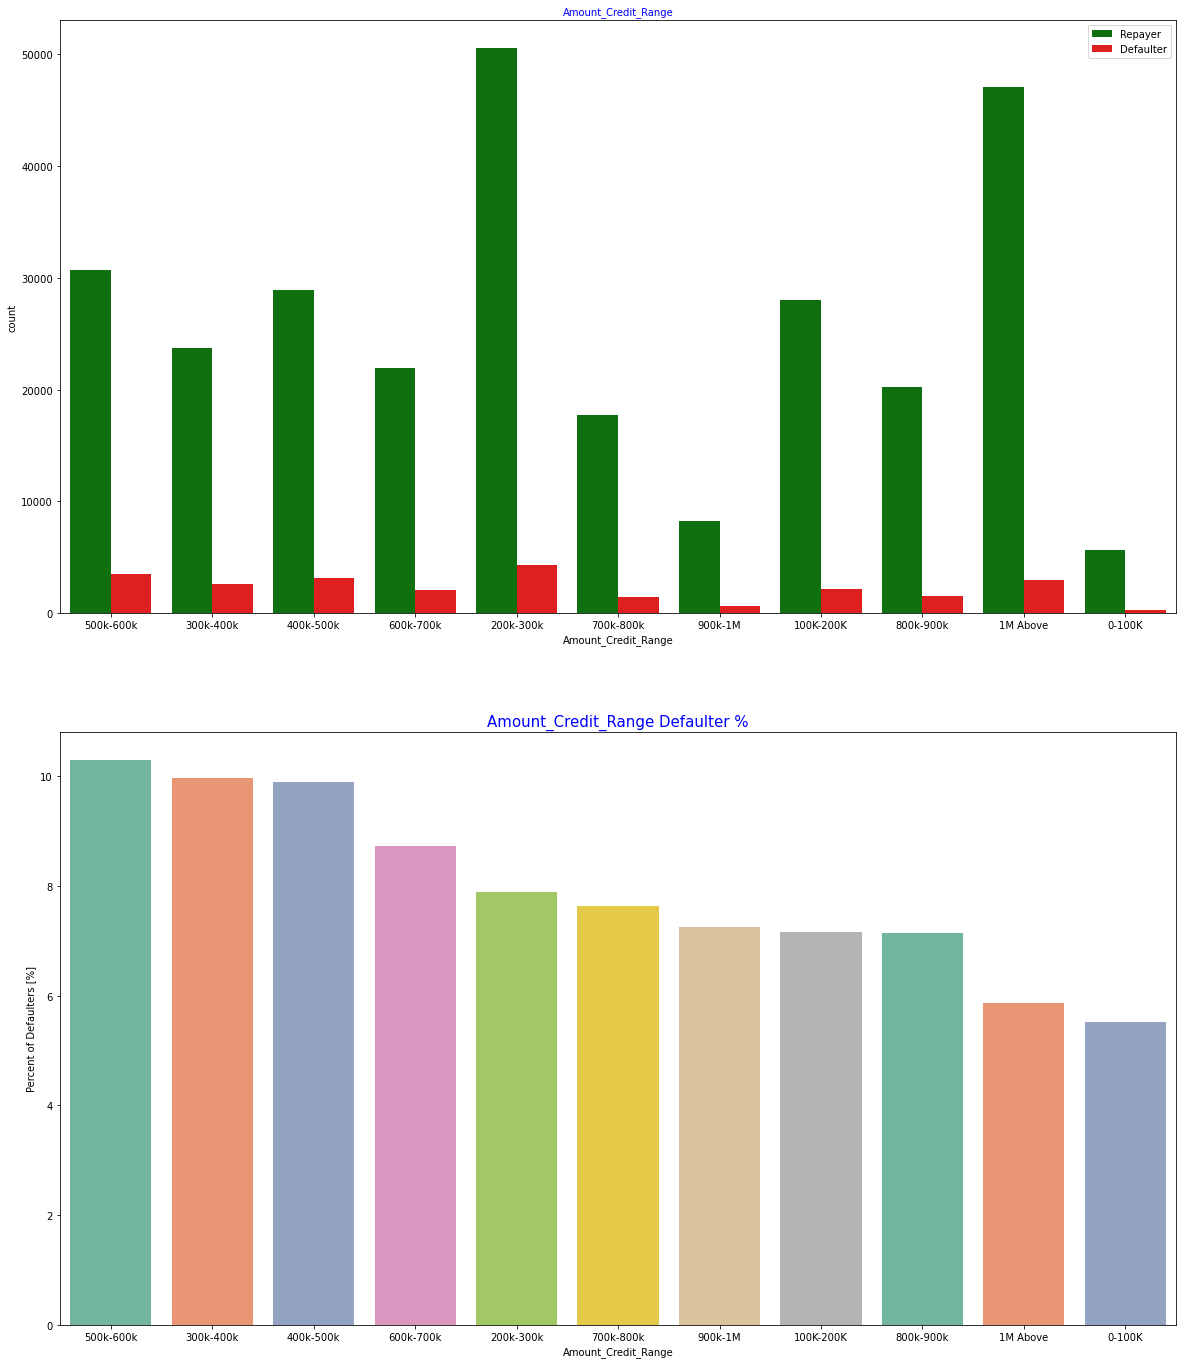

In [373]:
univariate_categorical("Amount_Credit_Range",False,False,False)

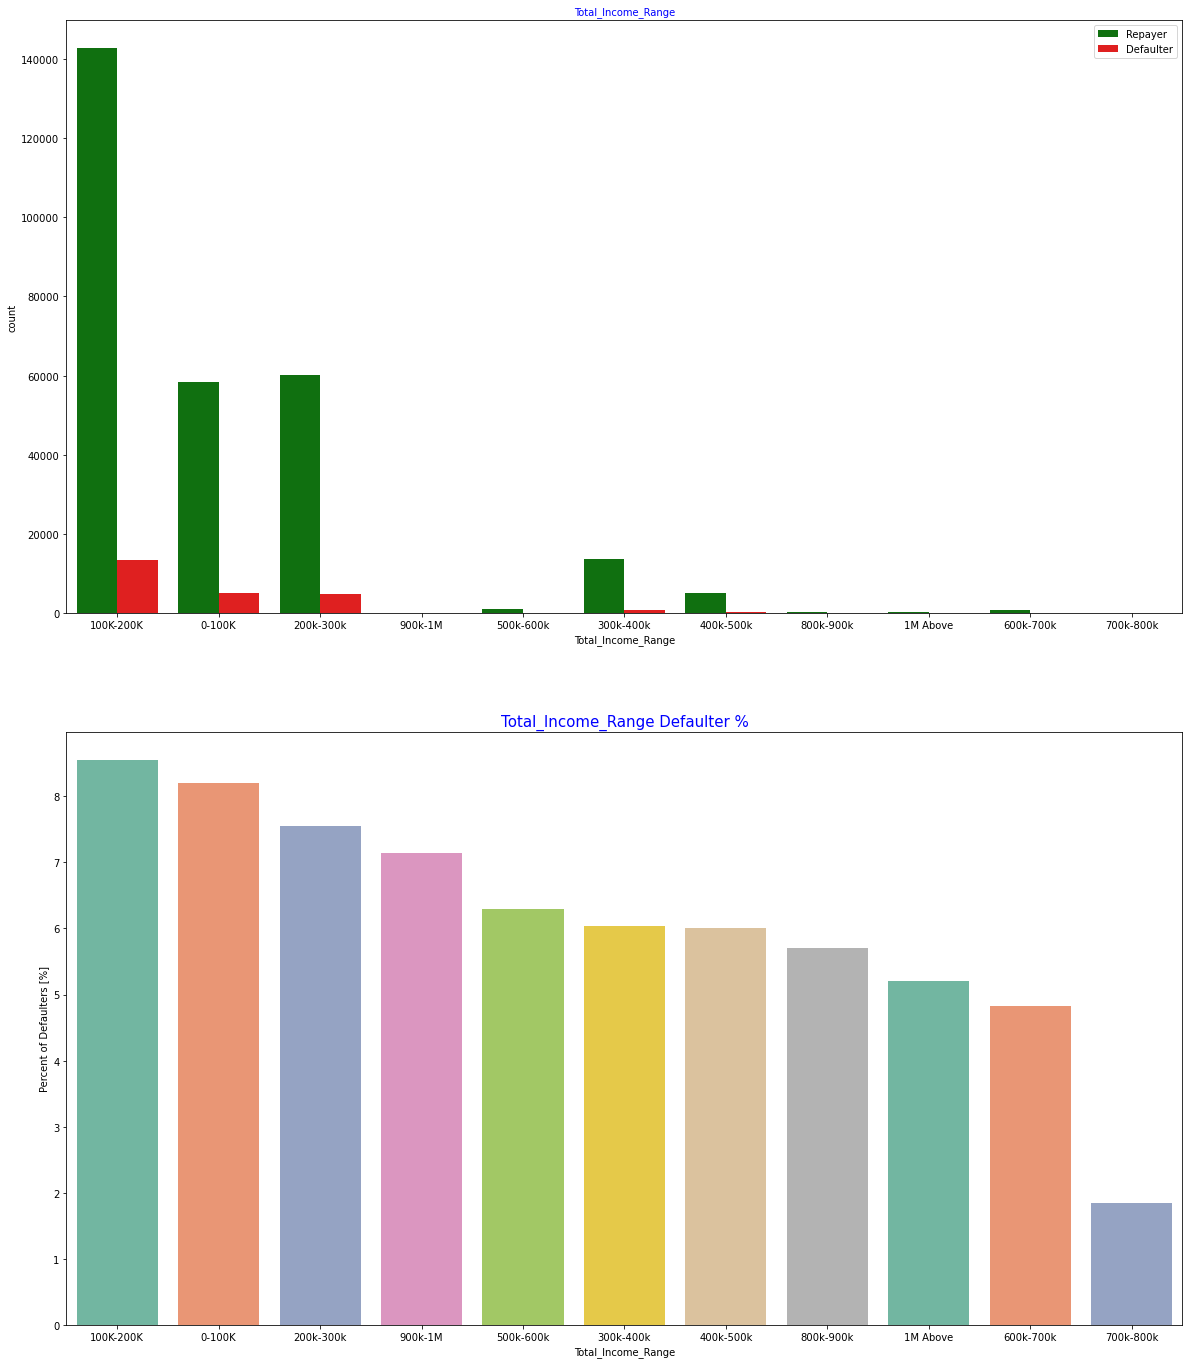

In [374]:
univariate_categorical("Total_Income_Range",False,False,False)

#### - Applicant with Income more than 600,000 are less likely to default

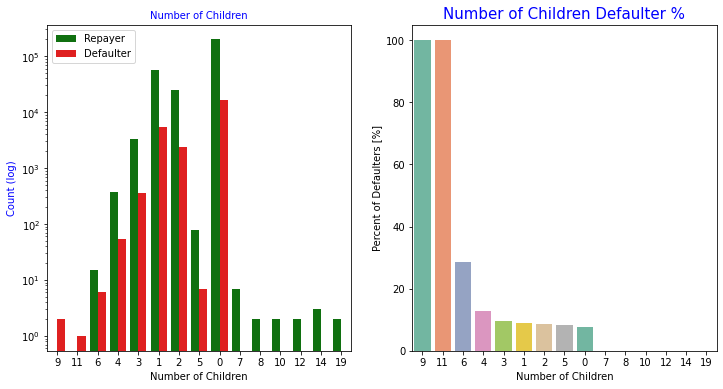

In [375]:
univariate_categorical("Number of Children",True)

#### People who have 9 and 11 children did not return loans at all. 

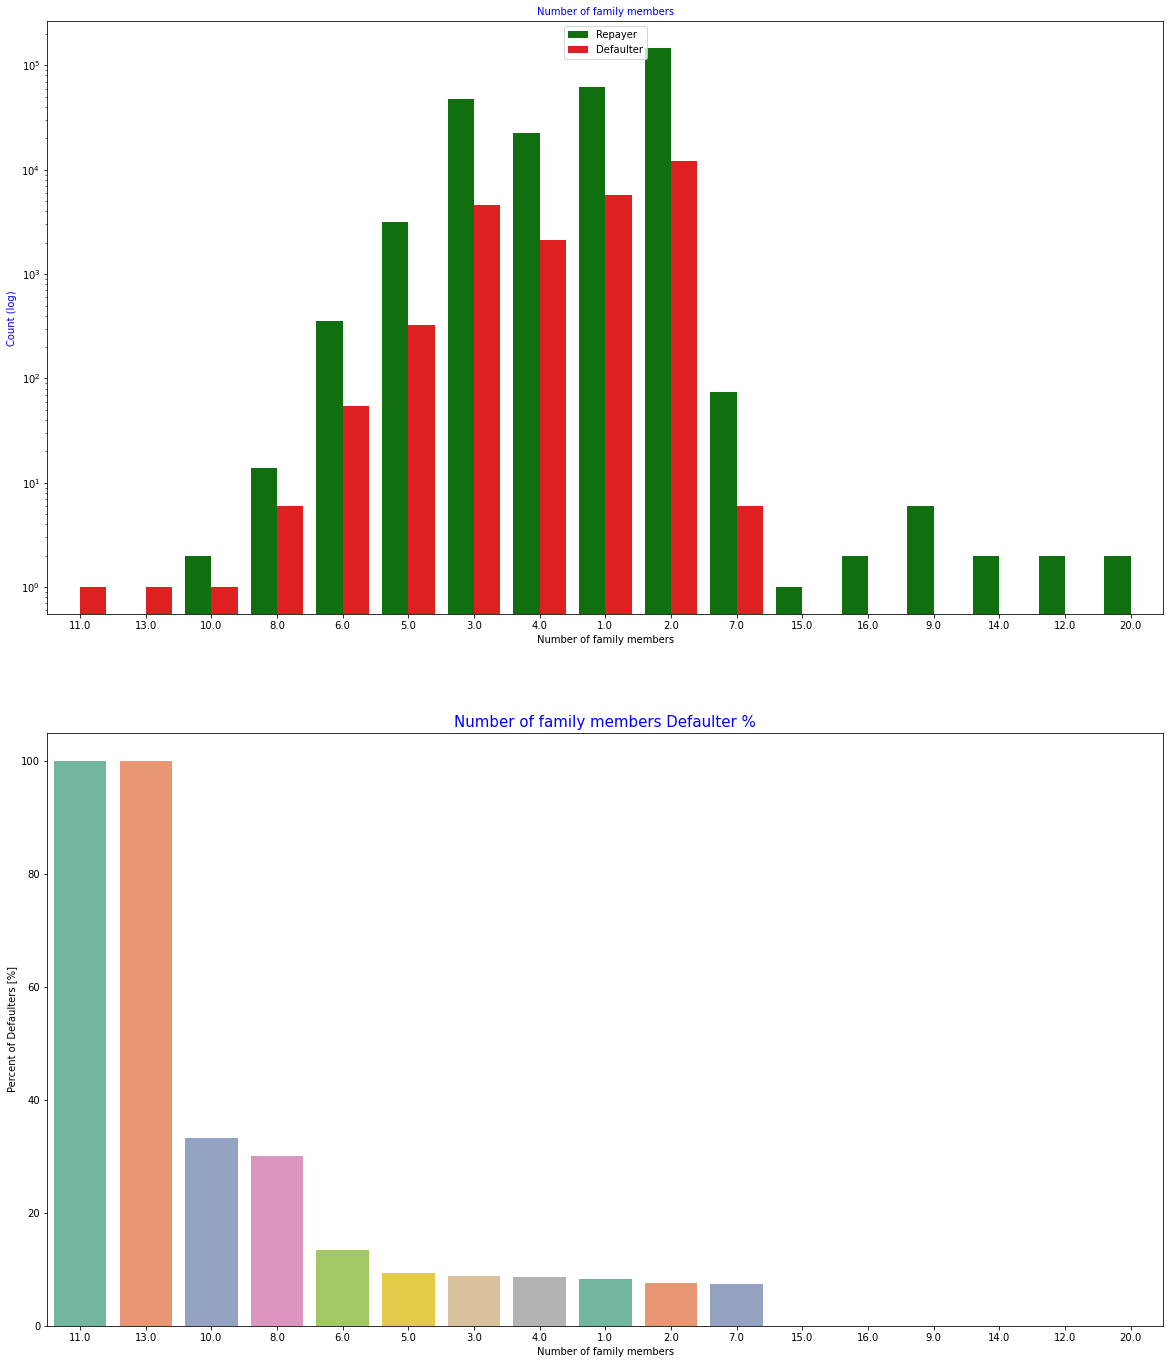

In [376]:
univariate_categorical("Number of family members",True, False, False)

In [377]:
df.groupby('Income Type')['Total Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Income Type,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685942,25650.0,112500.0,135000.0,202500.0,117000000.0


In [378]:
def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

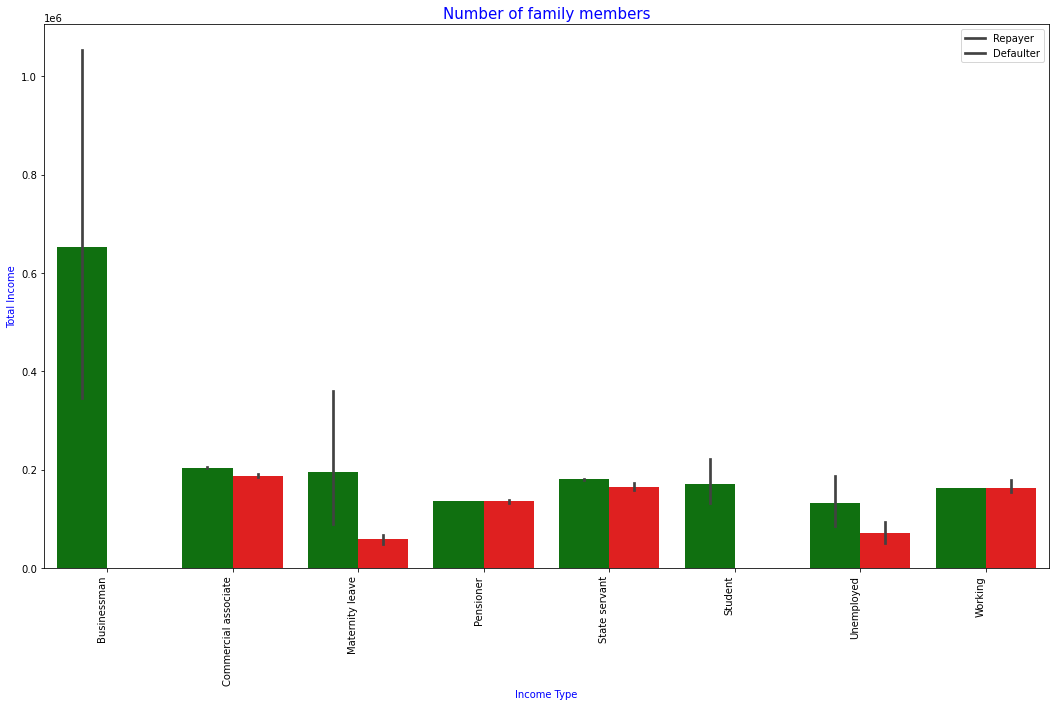

In [379]:
bivariate_bar('Income Type','Total Income',df,'Payment',(18,10))

#### Businessman's income is the highest and they are likely to return loans.

In [380]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['Loan Type', 'Gender', 'Have a car?', 'Have a house', 
                        'Number of Children', 'Total Income', 'Amount of Credit', 
                        'Suite Type', 'Income Type', 'Education Type', 'Family Status',
                        'Profession', 'Number of family members',                        
                        'Organization',
                        'Have a phone?', 'Have a mail?']


Repayer_df = df.loc[df['Payment']==0, cols_for_correlation] # Repayers
Defaulter_df = df.loc[df['Payment']==1, cols_for_correlation] # Defaulters

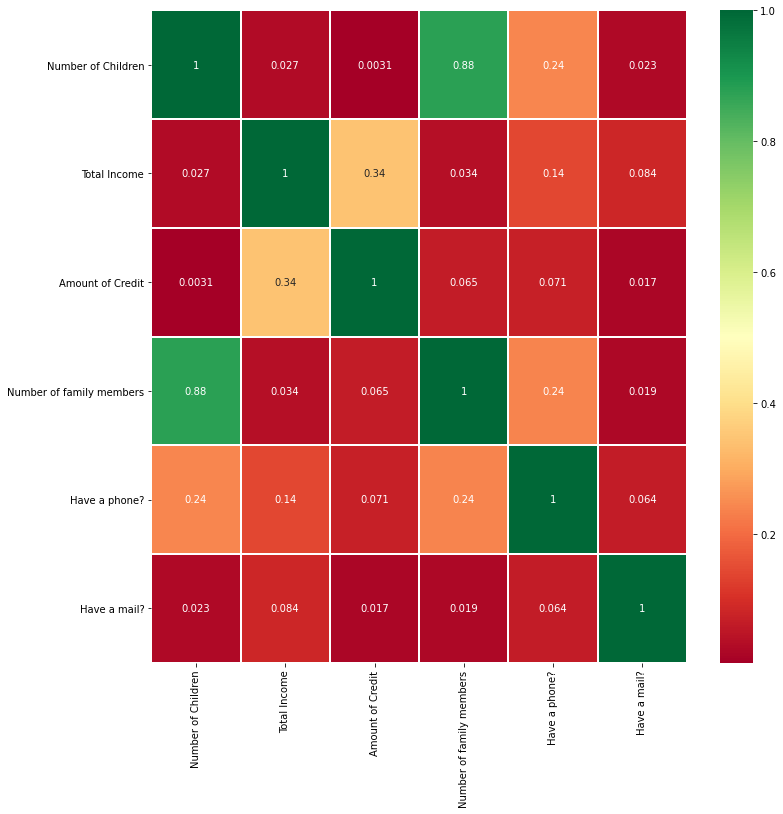

In [381]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(),cmap="RdYlGn",annot=True,linewidth =1)

#### Credit amount is highly correlated with Total income

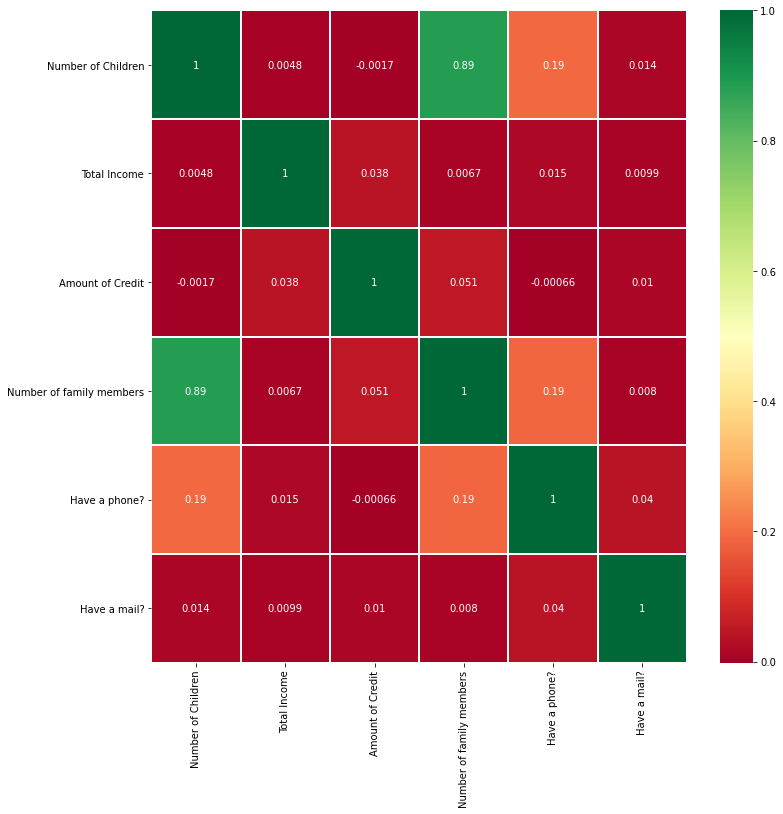

In [382]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

#### There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.34 among repayers.

# Conclusion

1. Education type: Academic degree has less defaults.
2. Income type: Student and Businessmen have no defaults.
3. Organization: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%
4. Total Income: Applicant with Income more than 700,000 are less likely to default
5. Number of children: People with zero to two children tend to repay the loans.

#### Decisive Factor whether an applicant will be Defaulter:

Gender: Men are at relatively higher default rate
Family status : People who have civil marriage or who are single default a lot.
Education type: People with Lower Secondary & Secondary education
Income type: Clients who are either at Maternity leave OR Unemployed default a lot.

Profession: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
Organiation: Organizations with highest percent of loans not repaid are "Transport type 3" (16%), "Industry type 13" (13.5%), "Industry type 8" (12.5%) and "Restaurant" (less than 12%). "Self-employed" people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

Number of children and family members: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
ters.

-------------------------------------------------------------------------------------------------
- Amount of loan: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.

- Total income: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.

- Number of children and family members: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.

# Downsampling
Our dataset is imbalanced. We have 24825 data for who refused to return the loan, and 282686 data for the people who repaid the loan. We undersample the 282686 to 25000.

In [425]:
new_df=df.iloc[:,:-2]

In [426]:
new_df.head()

,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,1,0,Core staff,2.0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Laborers,2.0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Core staff,1.0,Religion


In [506]:
shuffled_df = new_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
default_df = shuffled_df.loc[shuffled_df['Payment'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
repayer_df = shuffled_df.loc[shuffled_df['Payment'] == 0].sample(n=25000,random_state=42)

In [507]:
X=pd.concat([default_df,repayer_df])

In [508]:
default_df

,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
154228,1,Cash loans,F,N,Y,0,81000.0,351792.0,Family,Pensioner,Secondary / secondary special,Married,0,0,Unknown,2.0,XNA
149423,1,Cash loans,M,N,Y,1,157500.0,189000.0,Unaccompanied,Working,Secondary / secondary special,Separated,1,0,Laborers,2.0,Construction
43229,1,Cash loans,M,N,Y,1,157500.0,227520.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Drivers,3.0,Transport: type 3
51375,1,Cash loans,M,N,N,1,180000.0,269550.0,Family,State servant,Secondary / secondary special,Civil marriage,1,0,Unknown,3.0,Government
127761,1,Cash loans,F,N,N,0,90000.0,312768.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,0,0,Unknown,1.0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43206,1,Cash loans,F,N,N,3,156141.0,481320.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,1,0,Core staff,5.0,Trade: type 3
163331,1,Cash loans,F,N,N,0,202500.0,545040.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Industry: type 9
249545,1,Cash loans,F,N,N,1,112500.0,269550.0,Family,Working,Higher education,Married,1,0,Unknown,3.0,Business Entity Type 3
9603,1,Cash loans,F,N,N,0,180000.0,1350000.0,Unaccompanied,Working,Higher education,Married,1,0,Core staff,2.0,Security Ministries


In [509]:
repayer_df

,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
158786,0,Revolving loans,F,N,Y,0,202500.0,180000.0,Children,Working,Incomplete higher,Civil marriage,1,0,Unknown,2.0,Business Entity Type 3
297354,0,Revolving loans,M,Y,N,1,225000.0,540000.0,Unaccompanied,State servant,Higher education,Married,1,0,High skill tech staff,3.0,Military
205003,0,Revolving loans,M,Y,Y,1,180000.0,270000.0,Unaccompanied,State servant,Higher education,Married,1,0,Core staff,3.0,Police
85455,0,Cash loans,M,Y,Y,1,202500.0,522814.5,Unaccompanied,Working,Secondary / secondary special,Married,1,1,Laborers,3.0,Business Entity Type 3
294871,0,Cash loans,M,N,Y,0,90000.0,808650.0,"Spouse, partner",Pensioner,Secondary / secondary special,Married,0,0,Unknown,2.0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97185,0,Cash loans,F,Y,Y,0,229500.0,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,1,0,Unknown,2.0,Business Entity Type 2
225682,0,Cash loans,F,N,Y,1,171000.0,770292.0,Unaccompanied,Working,Higher education,Married,1,0,Core staff,3.0,Self-employed
29636,0,Cash loans,F,Y,N,1,103500.0,687600.0,Unaccompanied,State servant,Higher education,Married,1,0,HR staff,3.0,Business Entity Type 3
269278,0,Cash loans,F,N,N,0,112500.0,251091.0,Family,State servant,Secondary / secondary special,Married,1,0,Medicine staff,2.0,Medicine


In [510]:
X

,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
154228,1,Cash loans,F,N,Y,0,81000.0,351792.0,Family,Pensioner,Secondary / secondary special,Married,0,0,Unknown,2.0,XNA
149423,1,Cash loans,M,N,Y,1,157500.0,189000.0,Unaccompanied,Working,Secondary / secondary special,Separated,1,0,Laborers,2.0,Construction
43229,1,Cash loans,M,N,Y,1,157500.0,227520.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Drivers,3.0,Transport: type 3
51375,1,Cash loans,M,N,N,1,180000.0,269550.0,Family,State servant,Secondary / secondary special,Civil marriage,1,0,Unknown,3.0,Government
127761,1,Cash loans,F,N,N,0,90000.0,312768.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,0,0,Unknown,1.0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97185,0,Cash loans,F,Y,Y,0,229500.0,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,1,0,Unknown,2.0,Business Entity Type 2
225682,0,Cash loans,F,N,Y,1,171000.0,770292.0,Unaccompanied,Working,Higher education,Married,1,0,Core staff,3.0,Self-employed
29636,0,Cash loans,F,Y,N,1,103500.0,687600.0,Unaccompanied,State servant,Higher education,Married,1,0,HR staff,3.0,Business Entity Type 3
269278,0,Cash loans,F,N,N,0,112500.0,251091.0,Family,State servant,Secondary / secondary special,Married,1,0,Medicine staff,2.0,Medicine


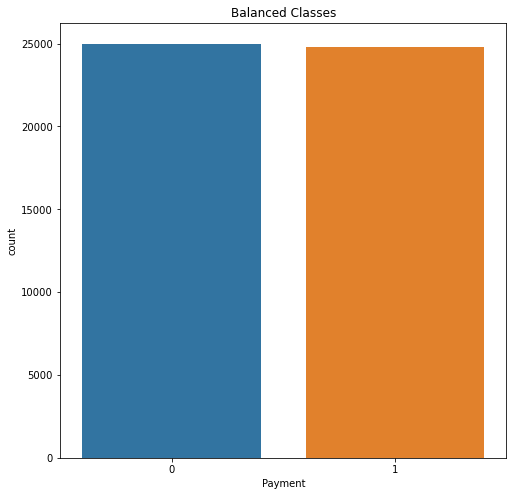

In [511]:
plt.figure(figsize=(8, 8))
sns.countplot('Payment', data=X)
plt.title('Balanced Classes')
plt.show()

In [512]:
y=X['Payment']
X=X.drop('Payment',axis=1)

In [513]:
X

,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
154228,Cash loans,F,N,Y,0,81000.0,351792.0,Family,Pensioner,Secondary / secondary special,Married,0,0,Unknown,2.0,XNA
149423,Cash loans,M,N,Y,1,157500.0,189000.0,Unaccompanied,Working,Secondary / secondary special,Separated,1,0,Laborers,2.0,Construction
43229,Cash loans,M,N,Y,1,157500.0,227520.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Drivers,3.0,Transport: type 3
51375,Cash loans,M,N,N,1,180000.0,269550.0,Family,State servant,Secondary / secondary special,Civil marriage,1,0,Unknown,3.0,Government
127761,Cash loans,F,N,N,0,90000.0,312768.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,0,0,Unknown,1.0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97185,Cash loans,F,Y,Y,0,229500.0,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,1,0,Unknown,2.0,Business Entity Type 2
225682,Cash loans,F,N,Y,1,171000.0,770292.0,Unaccompanied,Working,Higher education,Married,1,0,Core staff,3.0,Self-employed
29636,Cash loans,F,Y,N,1,103500.0,687600.0,Unaccompanied,State servant,Higher education,Married,1,0,HR staff,3.0,Business Entity Type 3
269278,Cash loans,F,N,N,0,112500.0,251091.0,Family,State servant,Secondary / secondary special,Married,1,0,Medicine staff,2.0,Medicine


In [514]:
sum(y_train)

18619

In [515]:
sum(y_test)

6206

# Scaling values

In [516]:
cat_columns = ['Loan Type','Gender','Have a car?','Have a house',"Have a mail?",'Suite Type','Income Type',
                       'Education Type','Family Status','Profession','Organization',"Have a phone?"
                      ]
X=pd.get_dummies(X,columns=cat_columns)

In [517]:
X

,Number of Children,Total Income,Amount of Credit,Number of family members,Loan Type_Cash loans,Loan Type_Revolving loans,Gender_F,Gender_M,Gender_XNA,Have a car?_N,...,Organization_Trade: type 6,Organization_Trade: type 7,Organization_Transport: type 1,Organization_Transport: type 2,Organization_Transport: type 3,Organization_Transport: type 4,Organization_University,Organization_XNA,Have a phone?_0,Have a phone?_1
154228,0,81000.0,351792.0,2.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
149423,1,157500.0,189000.0,2.0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
43229,1,157500.0,227520.0,3.0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
51375,1,180000.0,269550.0,3.0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
127761,0,90000.0,312768.0,1.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97185,0,229500.0,1125000.0,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
225682,1,171000.0,770292.0,3.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29636,1,103500.0,687600.0,3.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
269278,0,112500.0,251091.0,2.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [518]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
sc=StandardScaler()
X1=sc.fit_transform(X)

In [519]:
X1

array([[-0.59558595, -0.16173148, -0.60051854, ...,  2.36536894,
         2.36518443, -2.36518443],
       [ 0.76553092, -0.01826023, -1.0287315 , ..., -0.42276703,
        -0.42280001,  0.42280001],
       [ 0.76553092, -0.01826023, -0.92740734, ..., -0.42276703,
        -0.42280001,  0.42280001],
       ...,
       [ 0.76553092, -0.11953405,  0.28280089, ..., -0.42276703,
        -0.42280001,  0.42280001],
       [-0.59558595, -0.10265508, -0.86540547, ..., -0.42276703,
        -0.42280001,  0.42280001],
       [-0.59558595, -0.10265508, -0.33035234, ..., -0.42276703,
        -0.42280001,  0.42280001]])

In [520]:
X1=pd.DataFrame(X1)
X1.columns=X.columns
X1

,Number of Children,Total Income,Amount of Credit,Number of family members,Loan Type_Cash loans,Loan Type_Revolving loans,Gender_F,Gender_M,Gender_XNA,Have a car?_N,...,Organization_Trade: type 6,Organization_Trade: type 7,Organization_Transport: type 1,Organization_Transport: type 2,Organization_Transport: type 3,Organization_Transport: type 4,Organization_University,Organization_XNA,Have a phone?_0,Have a phone?_1
0,-0.595586,-0.161731,-0.600519,-0.178117,0.29721,-0.29721,0.786303,-0.786303,0.0,0.692996,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,2.365369,2.365184,-2.365184
1,0.765531,-0.018260,-1.028732,-0.178117,0.29721,-0.29721,-1.271774,1.271774,0.0,0.692996,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,-0.422767,-0.422800,0.422800
2,0.765531,-0.018260,-0.927407,0.900869,0.29721,-0.29721,-1.271774,1.271774,0.0,0.692996,...,-0.040601,-0.169217,-0.022406,-0.084832,13.497413,-0.138593,-0.058856,-0.422767,-0.422800,0.422800
3,0.765531,0.023937,-0.816850,0.900869,0.29721,-0.29721,-1.271774,1.271774,0.0,0.692996,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,-0.422767,-0.422800,0.422800
4,-0.595586,-0.144853,-0.703168,-1.257103,0.29721,-0.29721,0.786303,-0.786303,0.0,0.692996,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,2.365369,2.365184,-2.365184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49820,-0.595586,0.116772,1.433351,-0.178117,0.29721,-0.29721,0.786303,-0.786303,0.0,-1.443010,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,-0.422767,-0.422800,0.422800
49821,0.765531,0.007058,0.500316,0.900869,0.29721,-0.29721,0.786303,-0.786303,0.0,0.692996,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,-0.422767,-0.422800,0.422800
49822,0.765531,-0.119534,0.282801,0.900869,0.29721,-0.29721,0.786303,-0.786303,0.0,-1.443010,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,-0.422767,-0.422800,0.422800
49823,-0.595586,-0.102655,-0.865405,-0.178117,0.29721,-0.29721,0.786303,-0.786303,0.0,0.692996,...,-0.040601,-0.169217,-0.022406,-0.084832,-0.074088,-0.138593,-0.058856,-0.422767,-0.422800,0.422800


In [521]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,random_state=42,stratify=y)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (37368, 120)
X_test shape:  (12457, 120)
Y_train shape:  (37368,)
Y_test shape:  (12457,)


# XGBoost Model

In [522]:
clf_xgb=XGBClassifier(objective='binary:logistic',missing=0,seed=42)
clf_xgb.fit(X_train, y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.59608
[1]	validation_0-aucpr:0.60639
[2]	validation_0-aucpr:0.61211
[3]	validation_0-aucpr:0.61547
[4]	validation_0-aucpr:0.61883
[5]	validation_0-aucpr:0.61914
[6]	validation_0-aucpr:0.61840
[7]	validation_0-aucpr:0.62141
[8]	validation_0-aucpr:0.61958
[9]	validation_0-aucpr:0.61999
[10]	validation_0-aucpr:0.61947
[11]	validation_0-aucpr:0.62058
[12]	validation_0-aucpr:0.62082
[13]	validation_0-aucpr:0.62140
[14]	validation_0-aucpr:0.62167
[15]	validation_0-aucpr:0.62207
[16]	validation_0-aucpr:0.62206
[17]	validation_0-aucpr:0.62127
[18]	validation_0-aucpr:0.62028
[19]	validation_0-aucpr:0.62047
[20]	validation_0-aucpr:0.62021
[21]	validation_0-aucpr:0.62047
[22]	validation_0-aucpr:0.62035
[23]	validation_0-aucpr:0.62024
[24]	validation_0-aucpr:0.62314
[25]	validation_0-aucpr:0.62307
[26]	validation_0-aucpr:0.62441
[27]	validation_0-aucpr:0.62509
[28]	validation_0-aucpr:0.62475
[29]	validation_0-aucpr:0.62487
[30]	validation_0-aucpr:0.62435
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

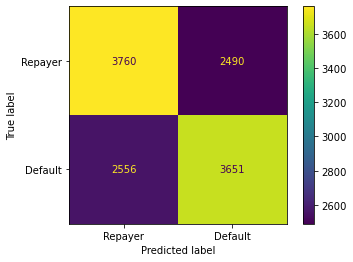

In [523]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Repayer','Default'])

# Optimization by using GridSearch and Cross Validation

In [526]:
param_grid1={
'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1],
    'reg_lambda':[0,1,10],
    'scale_pos_weight':[1,2,3,5]
}

# Output: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10,'scale_pos_weight': 1}
# In the next param_grid, we choose optimal parameter values with respect to the param_gird1.

param_grid2={
    'max_depth':[5,6,7],
    'learning_rate':[0.1],
    'gamma':[1,2],
    'reg_lambda':[10,20,30],
    'scale_pos_weight':[1]
}

optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective='binary:logistic',
                              seed=42,
                              subsample=0.9,
                              colsample_bytree=0.5),
    param_grid=param_grid2,
    scoring='roc_auc',
    verbose=2,
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train,
                  y_train,
                   verbose=False,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
                   eval_set=[(X_test,y_test)])

print(optimal_params.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'gamma': 2, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 30, 'scale_pos_weight': 1}


# Building, Evaluating and Drawing Optimized XGBoost Model

In [530]:
clf_xgb=XGBClassifier(seed=42,
                         objective='binary:logistic',
                         gamma=1,
                         learning_rate=0.1,
                          max_depth=6,
                          reg_lambda=20,
                          scale_pos_weight=1,
                          subsample=0.9,
                          colsample_bytree=0.5)


clf_xgb.fit(X_train, y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.59628
[1]	validation_0-aucpr:0.60034
[2]	validation_0-aucpr:0.60774
[3]	validation_0-aucpr:0.61300
[4]	validation_0-aucpr:0.61543
[5]	validation_0-aucpr:0.61706
[6]	validation_0-aucpr:0.61792
[7]	validation_0-aucpr:0.61773
[8]	validation_0-aucpr:0.61909
[9]	validation_0-aucpr:0.61913
[10]	validation_0-aucpr:0.61916
[11]	validation_0-aucpr:0.61937
[12]	validation_0-aucpr:0.62084
[13]	validation_0-aucpr:0.62147
[14]	validation_0-aucpr:0.62164
[15]	validation_0-aucpr:0.62241
[16]	validation_0-aucpr:0.62247
[17]	validation_0-aucpr:0.62212
[18]	validation_0-aucpr:0.62181
[19]	validation_0-aucpr:0.62174
[20]	validation_0-aucpr:0.62179
[21]	validation_0-aucpr:0.62305
[22]	validation_0-aucpr:0.62357
[23]	validation_0-aucpr:0.62375
[24]	validation_0-aucpr:0.62482
[25]	validation_0-aucpr:0.62562
[26]	validation_0-aucpr:0.62554
[27]	validation_0-aucpr:0.62561
[28]	validation_0-aucpr:0.62601
[29]	validation_0-aucpr:0.62618
[30]	validation_0-aucpr:0.62737
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=20, scale_pos_weight=1, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

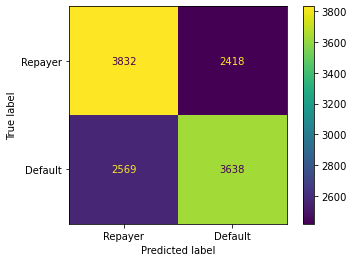

In [531]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Repayer','Default'])

-  In conclusion, of the 6050 people that repaid the loan, 3632 (63.34%) were correctly classified, and of the 6207 people that did not return the loan, 3638 (58.6%) were identified by the model. Before the optimization, it was 62.15% prediction for the people who repaid the loan, and 58.82% for the people who left the company.